# Innomatics Internship
## Data Visulization
### Himanshu Goswami

In [1]:
#import all require libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, train to train
Data columns (total 38 columns):
ID                       3998 non-null int64
Salary                   3998 non-null int64
DOJ                      3998 non-null datetime64[ns]
DOL                      3998 non-null object
Designation              3998 non-null object
JobCity                  3998 non-null object
Gender                   3998 non-null object
DOB                      3998 non-null datetime64[ns]
10percentage             3998 non-null float64
10board                  3998 non-null object
12graduation             3998 non-null int64
12percentage             3998 non-null float64
12board                  3998 non-null object
CollegeID                3998 non-null int64
CollegeTier              3998 non-null int64
Degree                   3998 non-null object
Specialization           3998 non-null object
collegeGPA               3998 non-null float64
CollegeCityID            3998 non-null int64
Colleg

In [5]:
df['DOL'].replace({'present':'2021'}, inplace=True)

In [6]:
df['DOL'] = pd.to_datetime(df['DOL'])

In [7]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,203097,420000,2012-06-01,2021-01-01,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
train,579905,500000,2013-09-01,2021-01-01,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
train,810601,325000,2014-06-01,2021-01-01,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
train,267447,1100000,2011-07-01,2021-01-01,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
train,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [8]:
df =df.drop('ID',axis=1)

### Dividing Categorical, Numerical and Data time Features

In [9]:
catg_var=[]
num_var=[]
date_time=[]

for col in df.columns:
        if (df[col].dtypes == 'object'):
            catg_var.append(col)
        elif (df[col].dtypes =='datetime64[ns]'):
            date_time.append(col)
        else:
            num_var.append(col)

In [10]:
print(catg_var)

['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState']


In [11]:
print(date_time)

['DOJ', 'DOL', 'DOB']


In [12]:
print(num_var)

['Salary', '10percentage', '12graduation', '12percentage', 'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


# Data Visulazation Univariate

# Count Plot
* Univeriate<br>
* Categorical Variable



In [13]:
df['Gender'].value_counts(normalize = True)

m    0.76063
f    0.23937
Name: Gender, dtype: float64

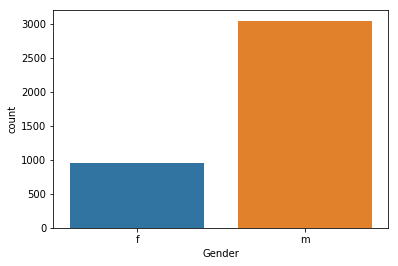

In [14]:
sns.countplot(df['Gender'])

In dataset males are 76.06% and females are 23.93% <br>
Males are greater than Females.

# Histogram 
* Univeriate<br>
* Numerical Variable

In [15]:
print(df['10percentage'].mean())
print(df['10percentage'].median())
print(df['10percentage'].mode()[0])

77.9254427213606
79.15
78.0


(array([  5.,   7.,  22.,  28.,  55.,  77., 112., 128., 197., 249., 322.,
        314., 397., 414., 436., 414., 398., 279., 125.,  19.]),
 array([43.   , 45.738, 48.476, 51.214, 53.952, 56.69 , 59.428, 62.166,
        64.904, 67.642, 70.38 , 73.118, 75.856, 78.594, 81.332, 84.07 ,
        86.808, 89.546, 92.284, 95.022, 97.76 ]),
 <a list of 20 Patch objects>)

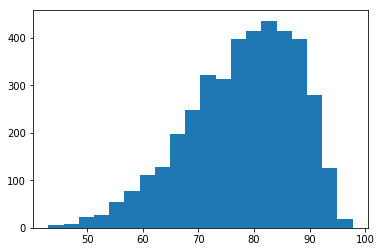

In [16]:
plt.hist(df['10percentage'],bins=20)

In this data set most of the people achived 78% in 10 class. and avg of all people percentege is 77.92%

In [17]:
print(df['12percentage'].mean())
print(df['12percentage'].median())
print(df['12percentage'].mode()[0])

74.46636568284127
74.4
70.0


(array([  1.,   7.,  14.,  41.,  63.,  97., 186., 303., 317., 340., 377.,
        391., 351., 345., 331., 220., 228., 185., 149.,  52.]),
 array([40.   , 42.935, 45.87 , 48.805, 51.74 , 54.675, 57.61 , 60.545,
        63.48 , 66.415, 69.35 , 72.285, 75.22 , 78.155, 81.09 , 84.025,
        86.96 , 89.895, 92.83 , 95.765, 98.7  ]),
 <a list of 20 Patch objects>)

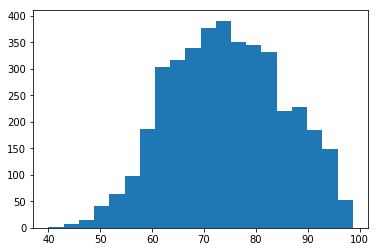

In [18]:
plt.hist(df['12percentage'],bins=20)

In this data set most of the people achived 70% in 12 class. and avg of all people percentege is 74.40%

# Count plot

* Univeriate<br>
* Categorical Variable<br>

## Count plot for all Categorical Features in Data set


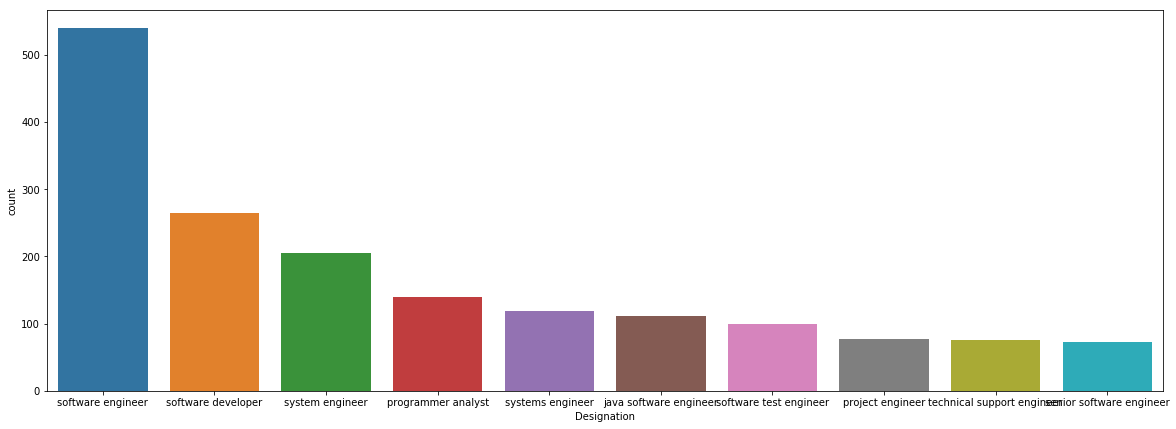

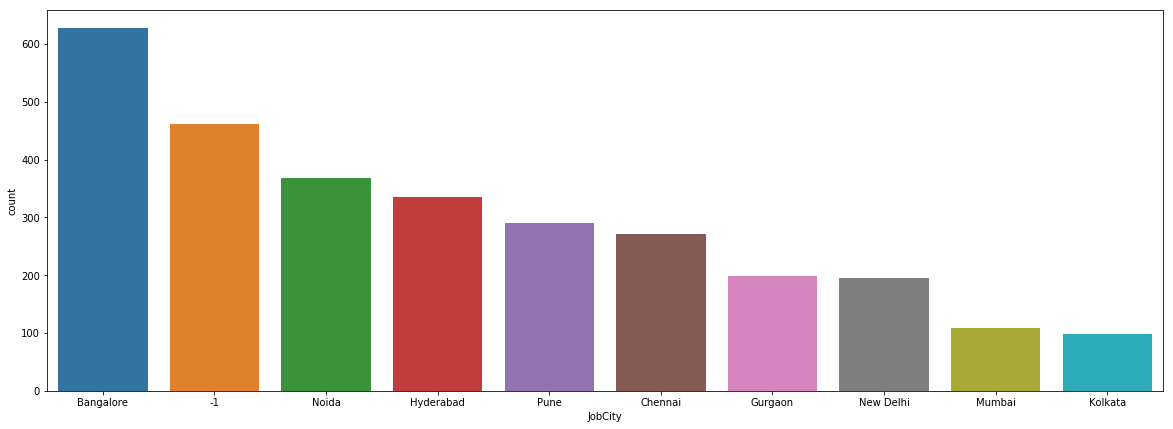

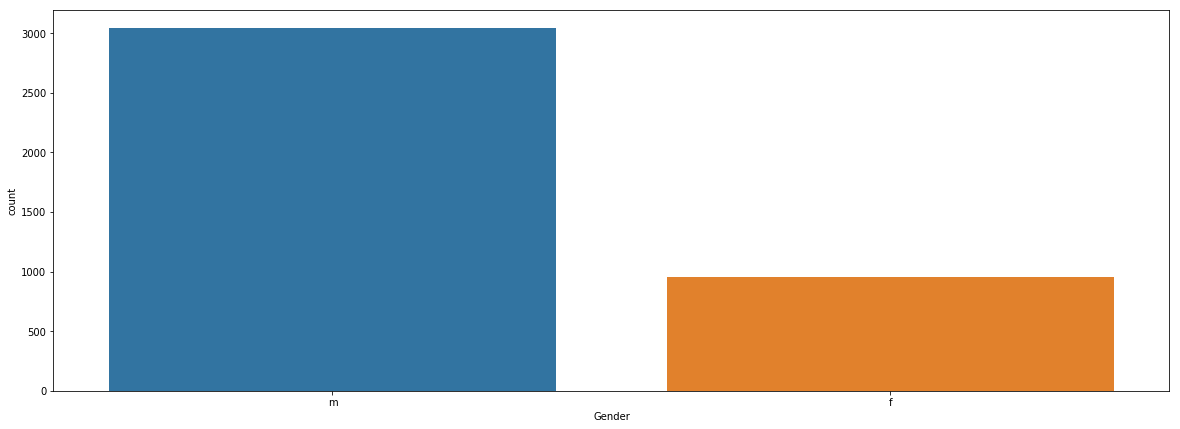

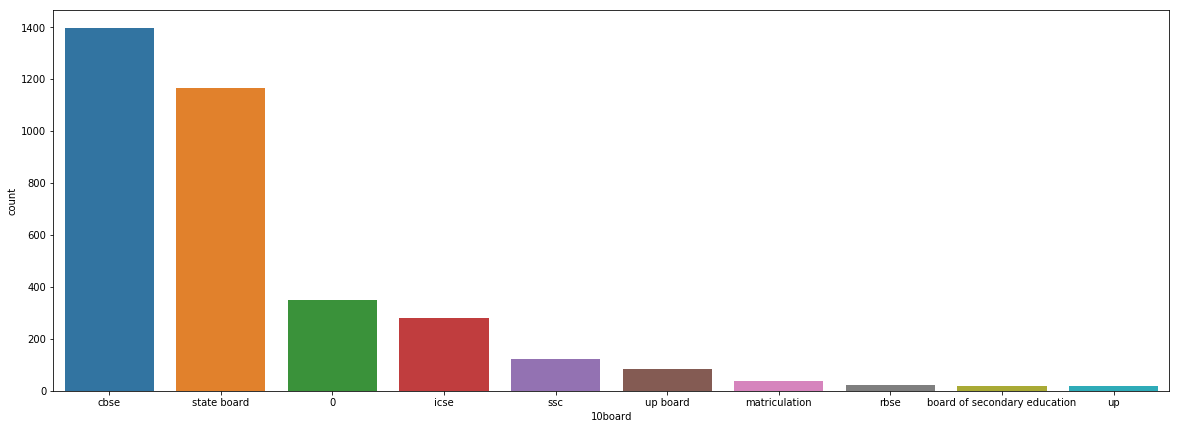

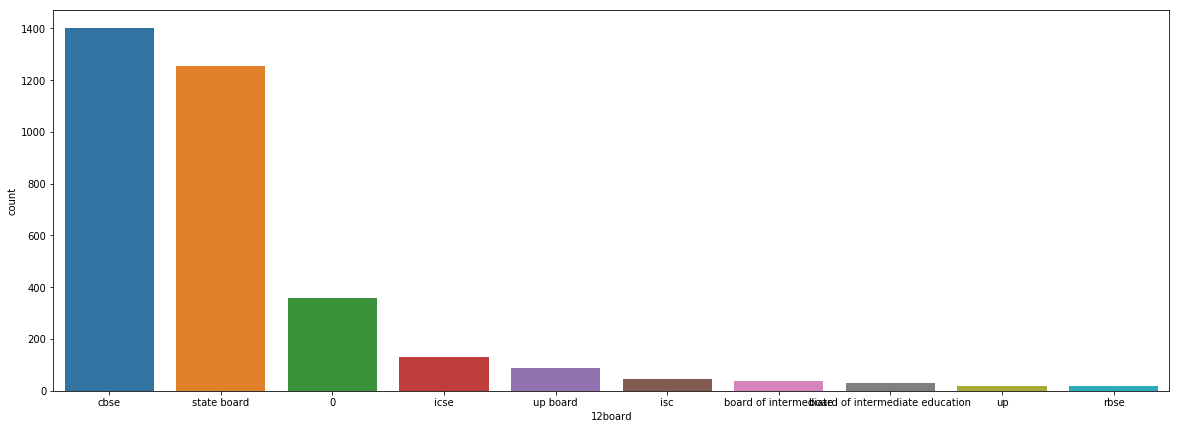

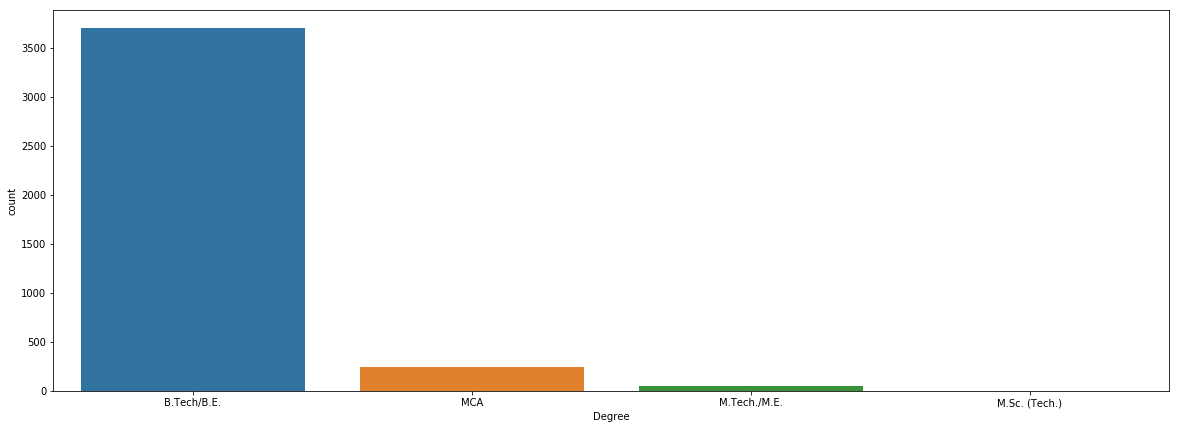

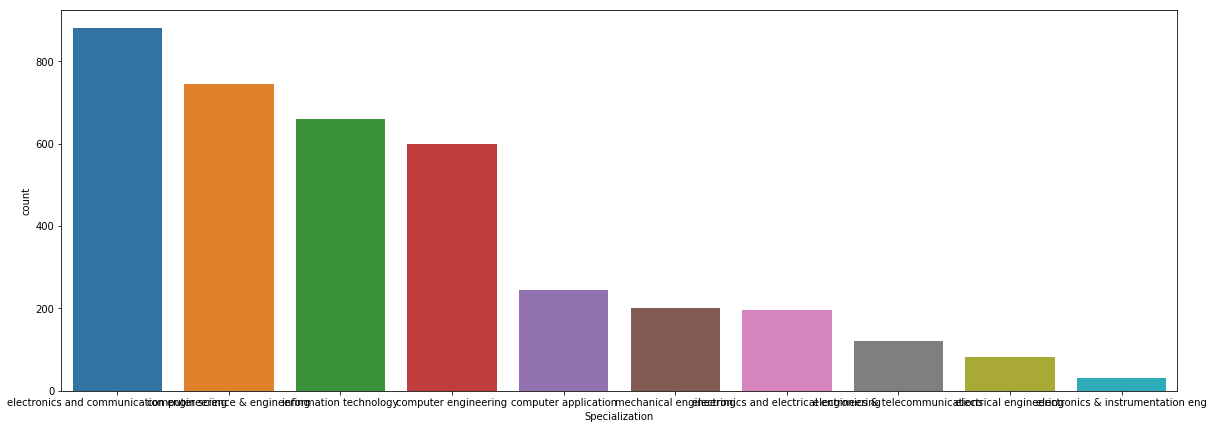

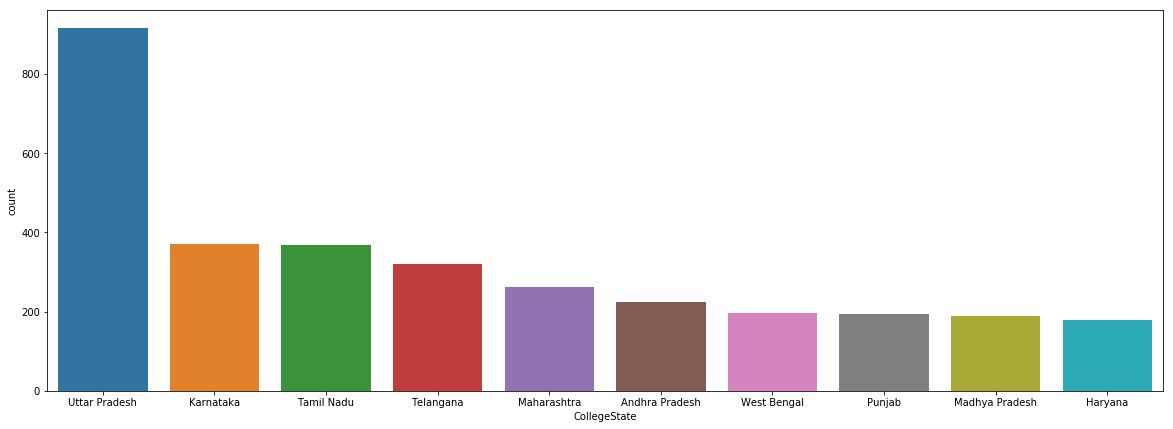

In [19]:
for i in catg_var:
    plt.figure(figsize=(20,7))
    sns.countplot(df[i].dropna(), order=df[i].value_counts().iloc[:10].index)

# Dist Plot

* Univeriate<br>
* Numerical Variable<br>

## Dist plot for all Numerical Features

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


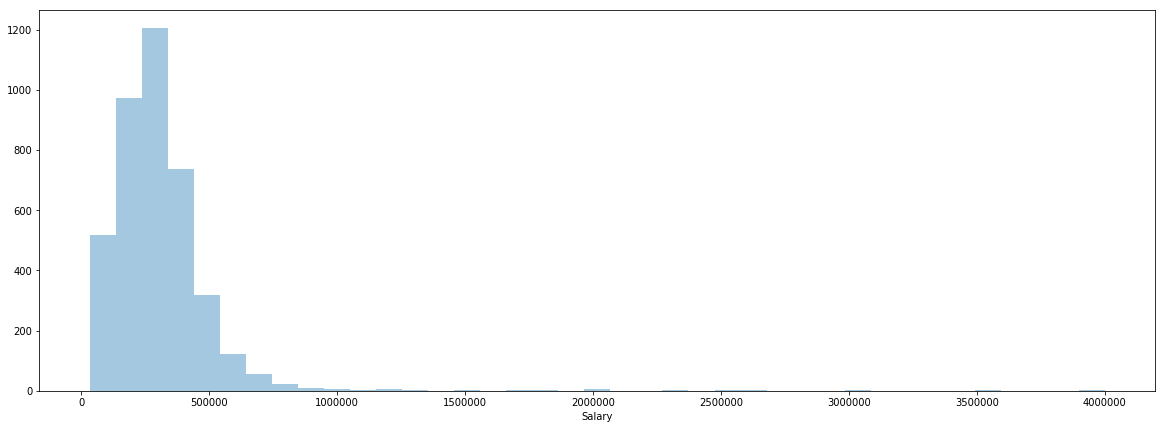

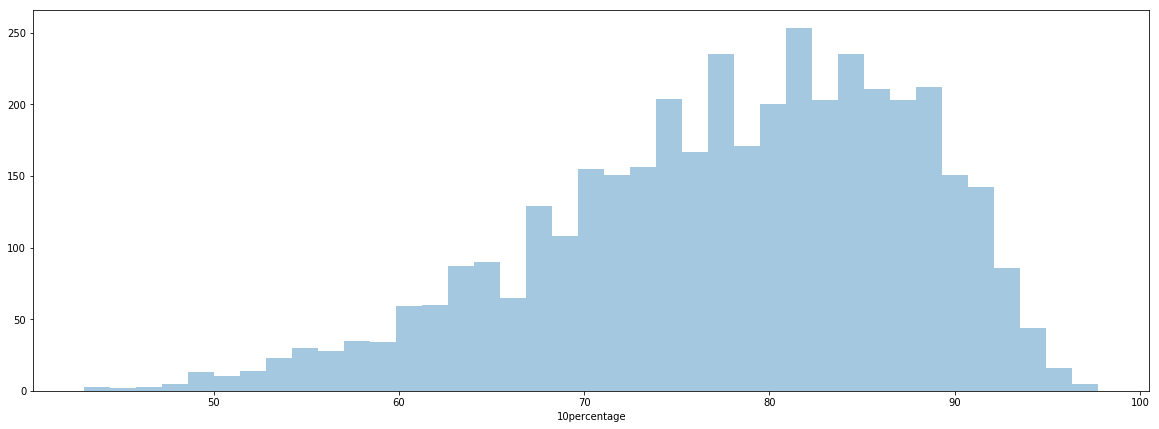

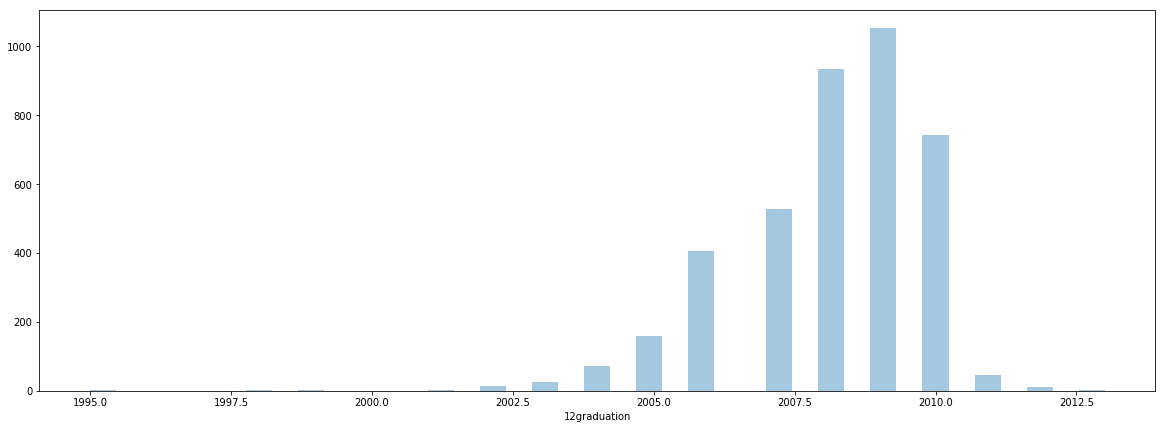

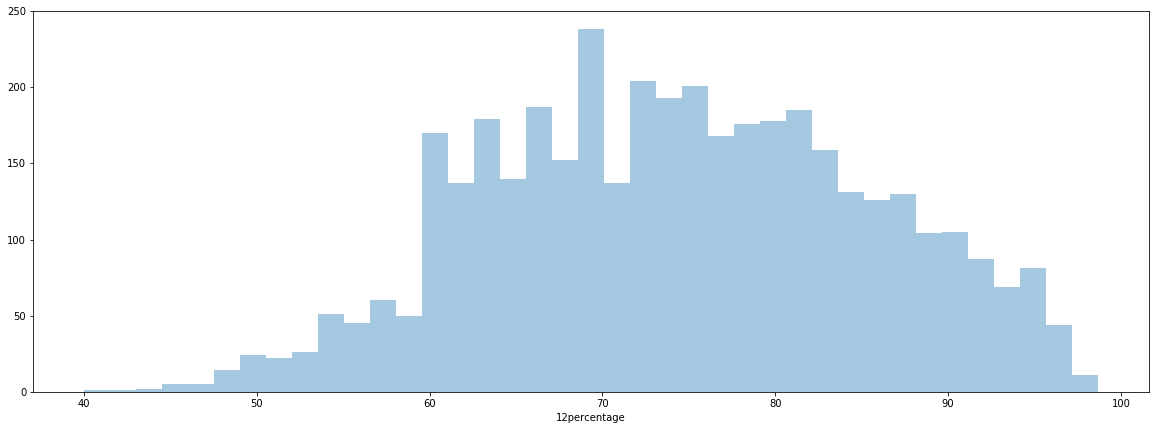

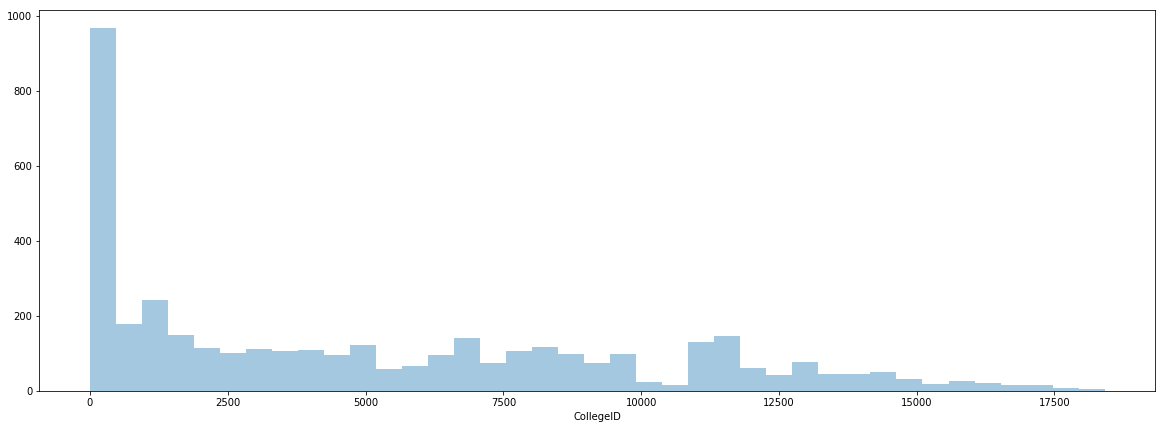

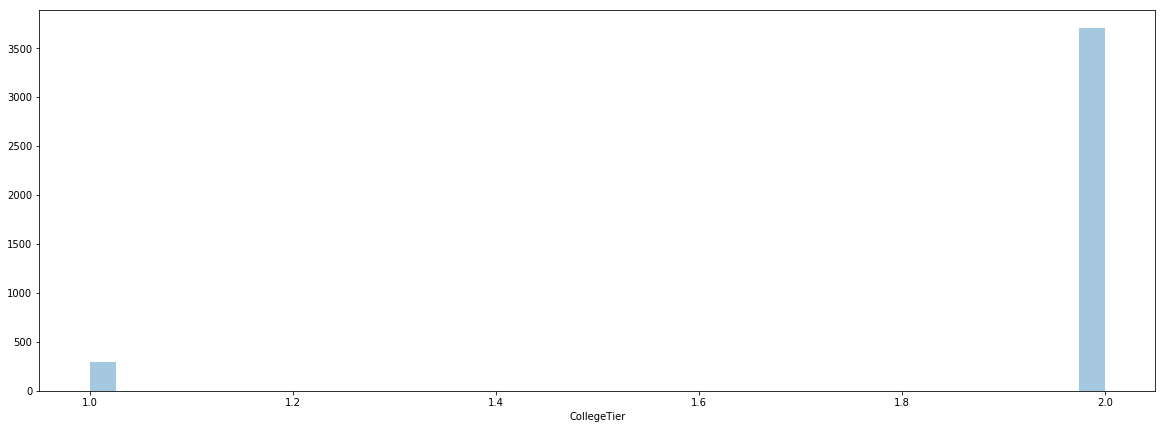

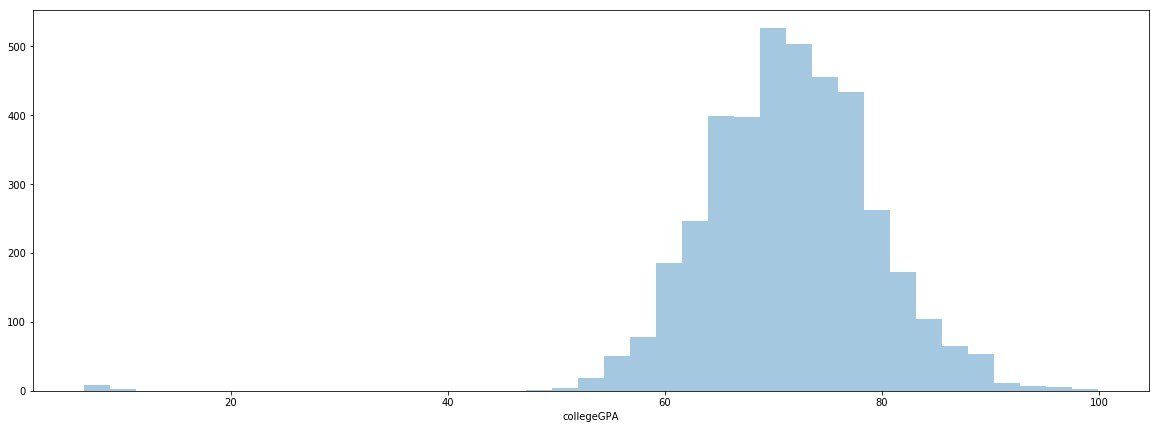

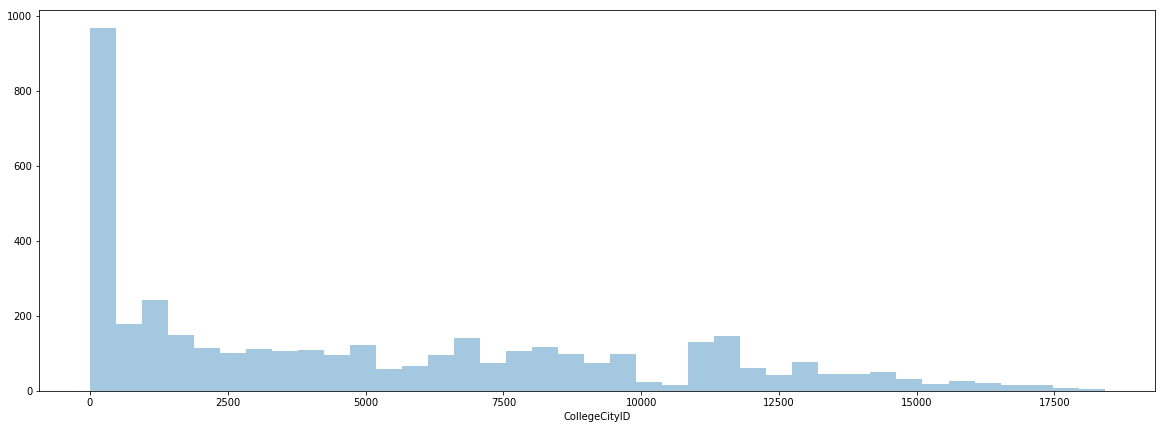

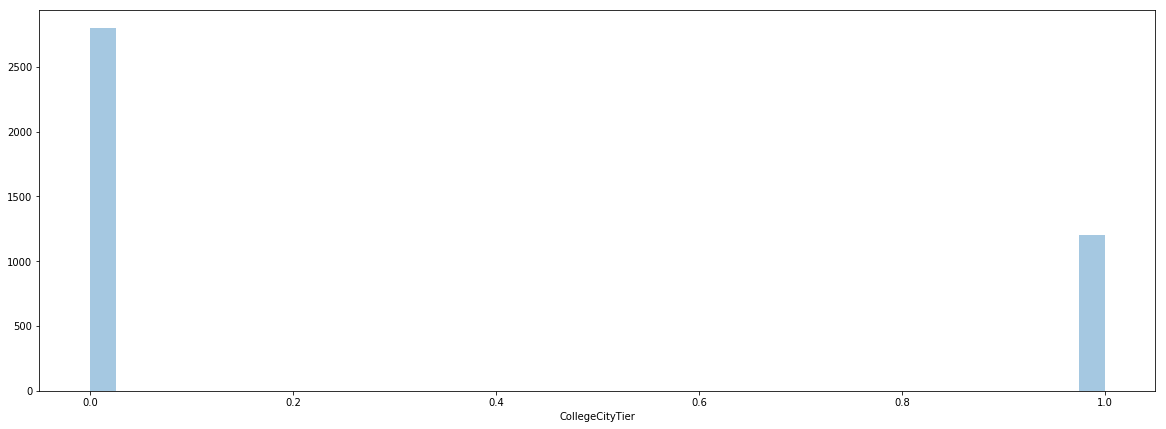

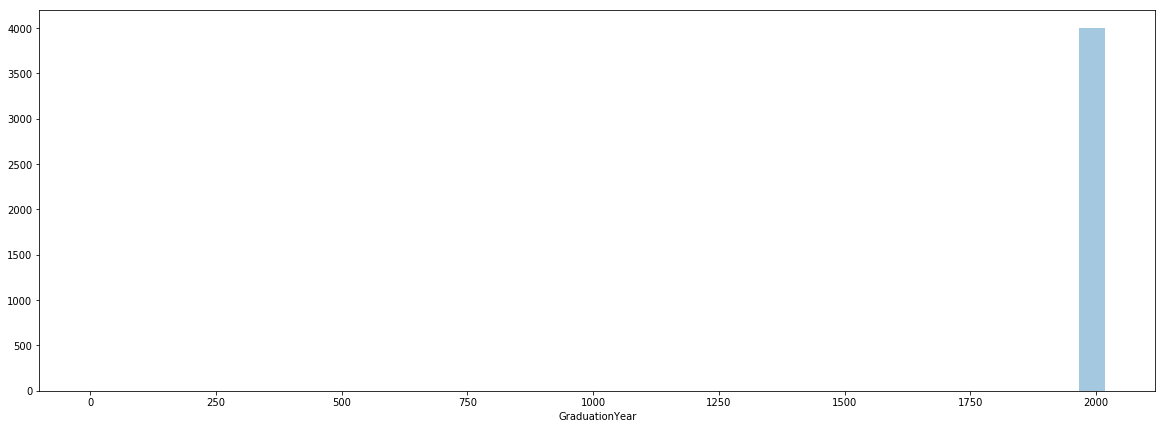

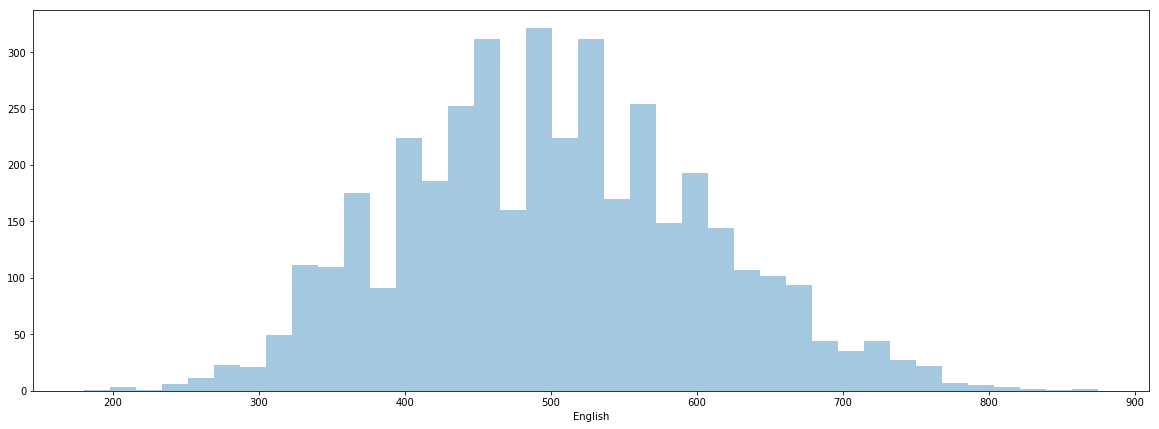

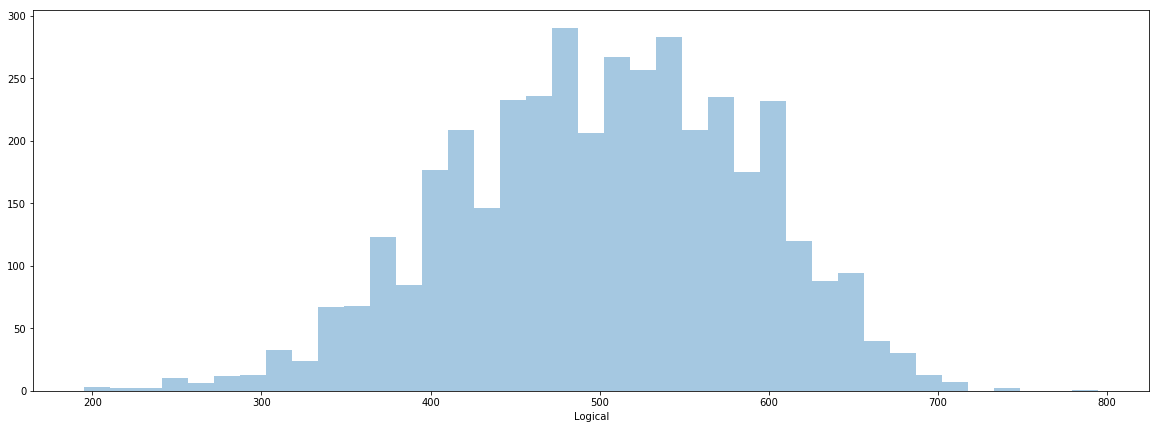

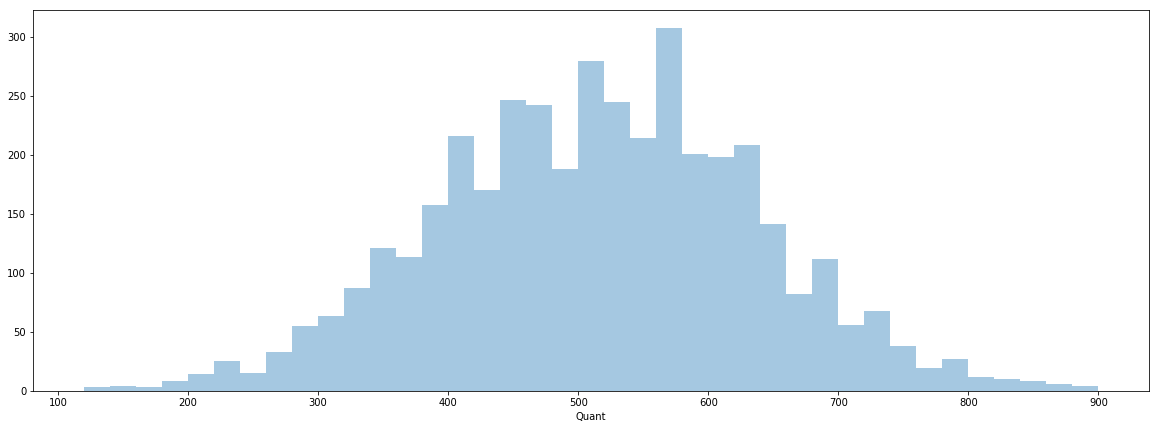

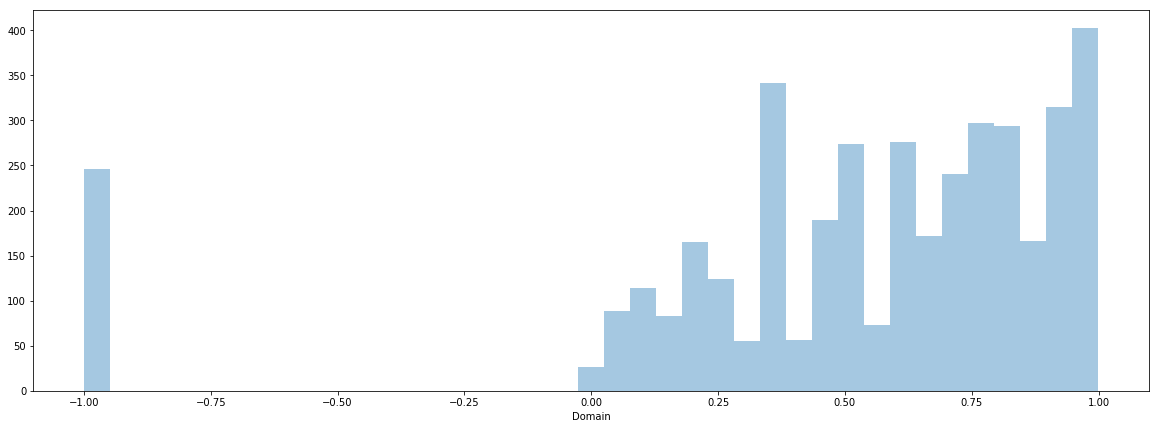

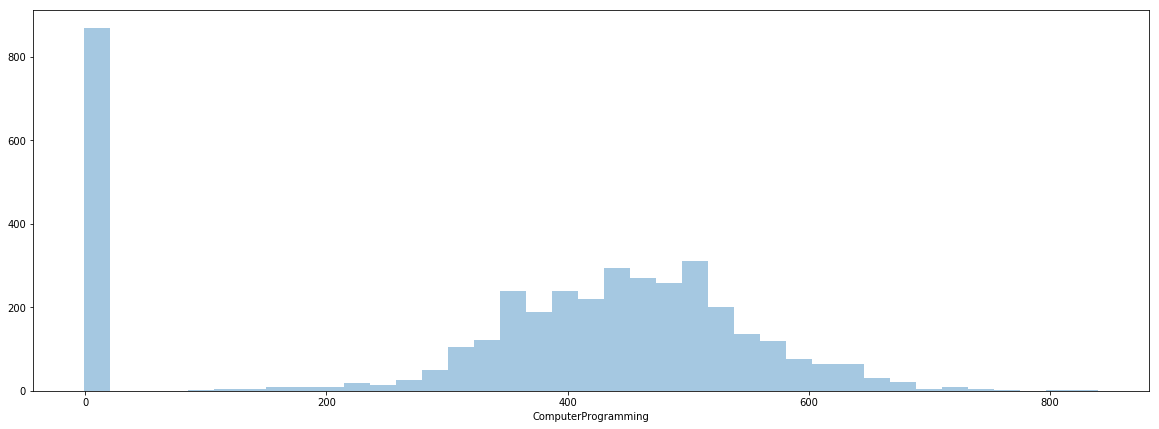

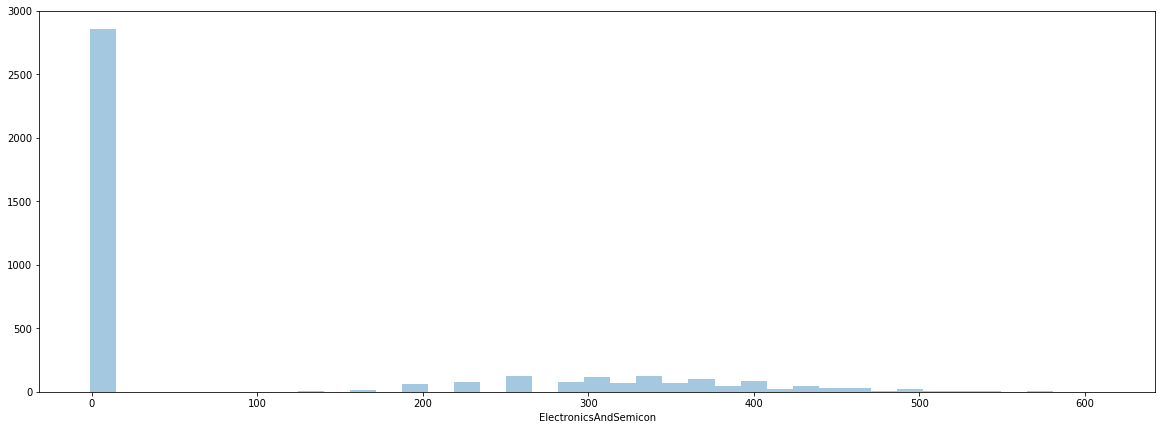

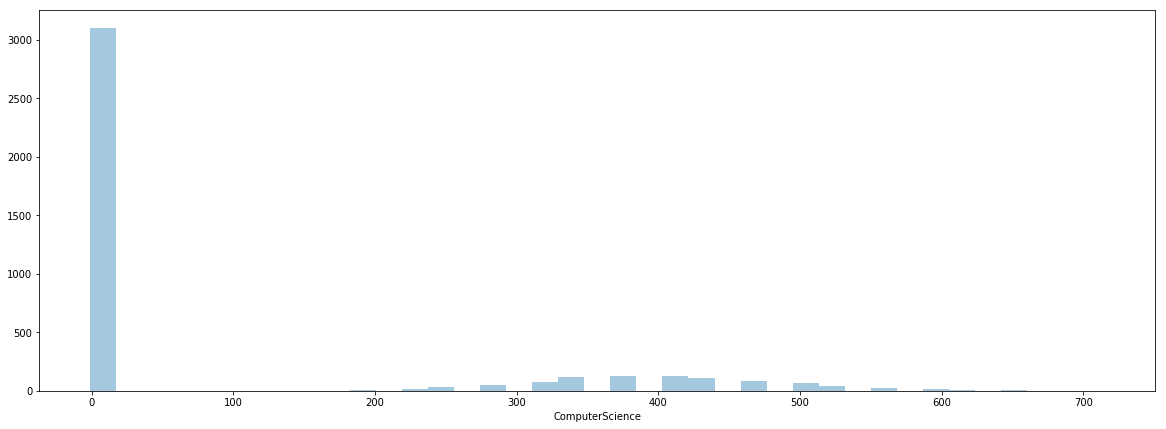

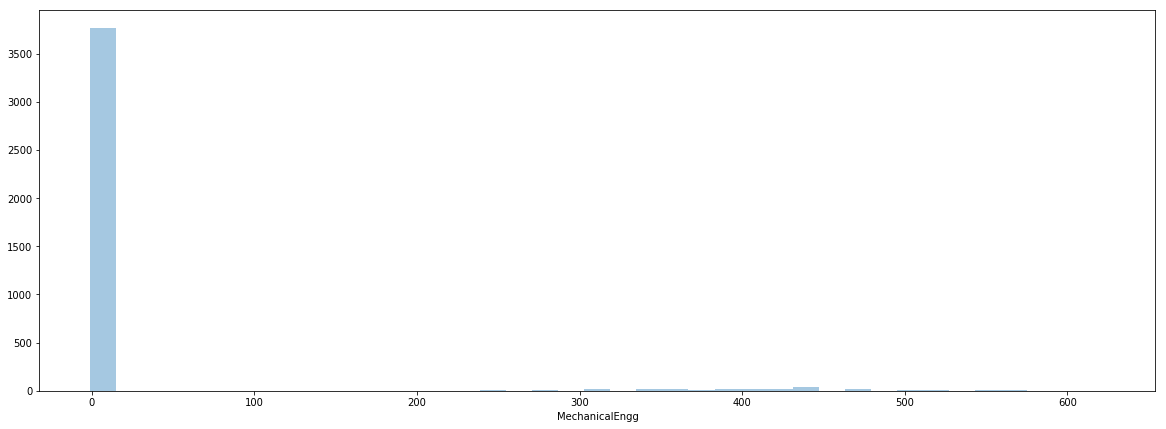

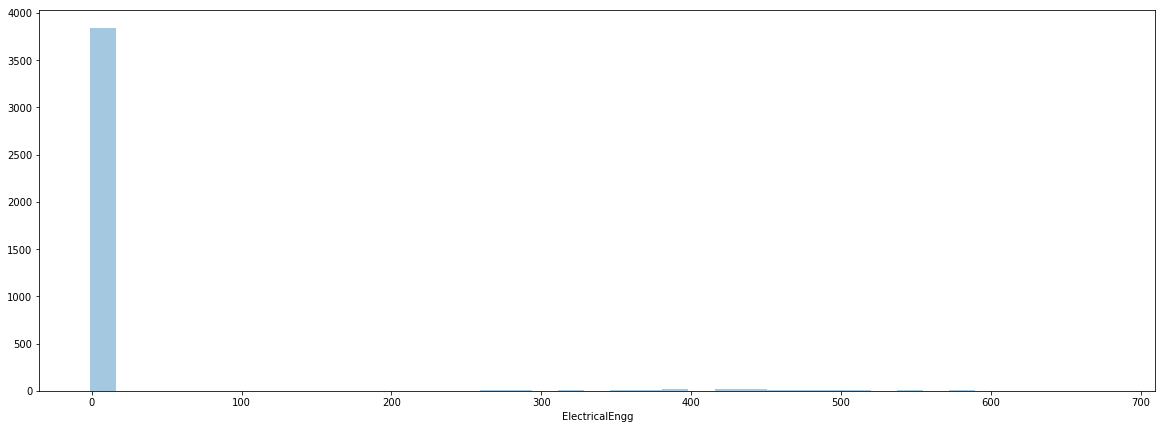

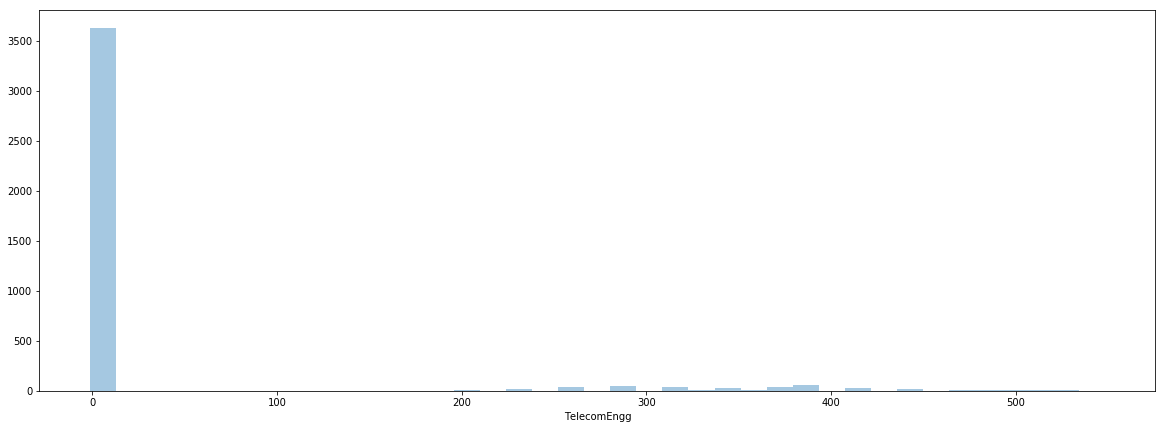

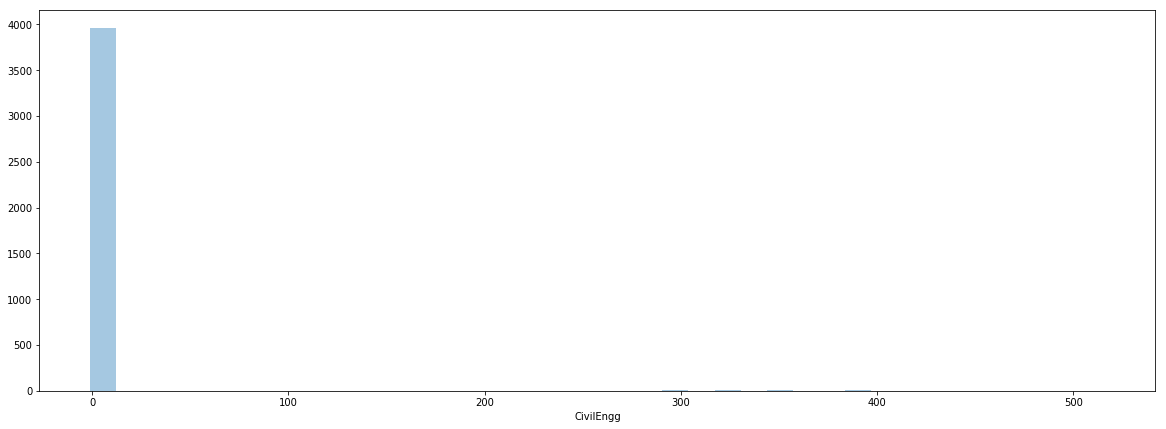

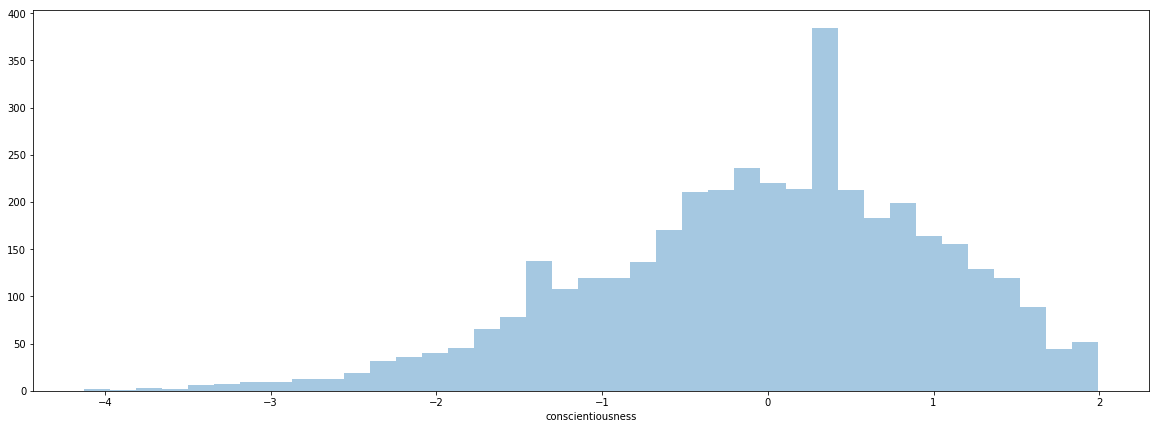

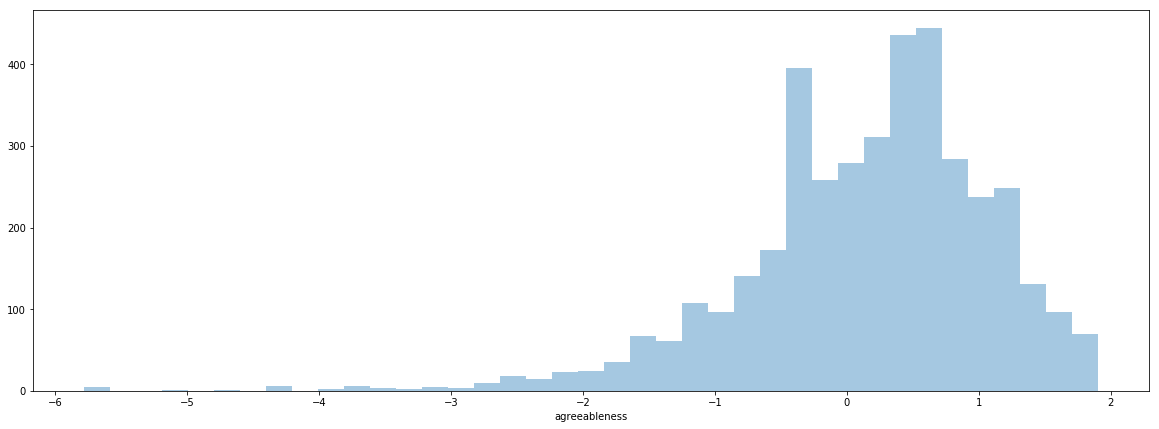

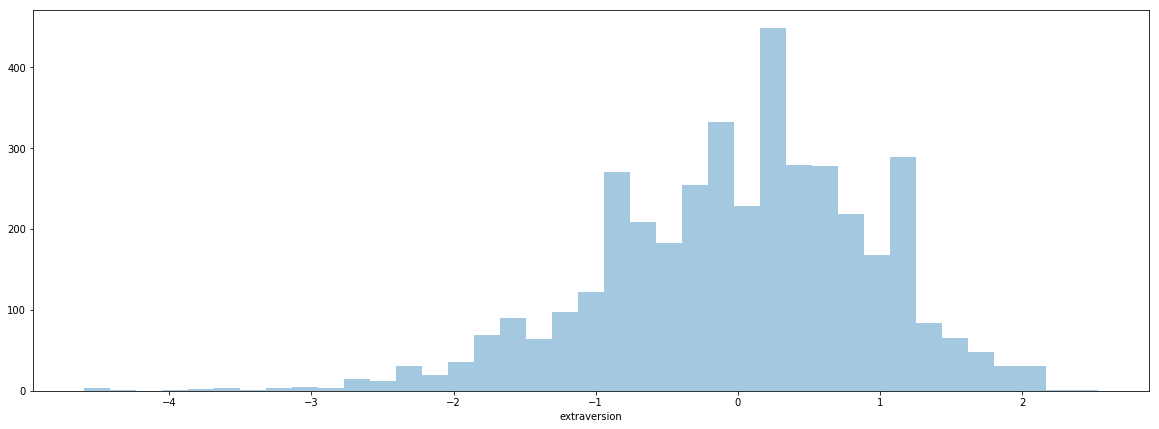

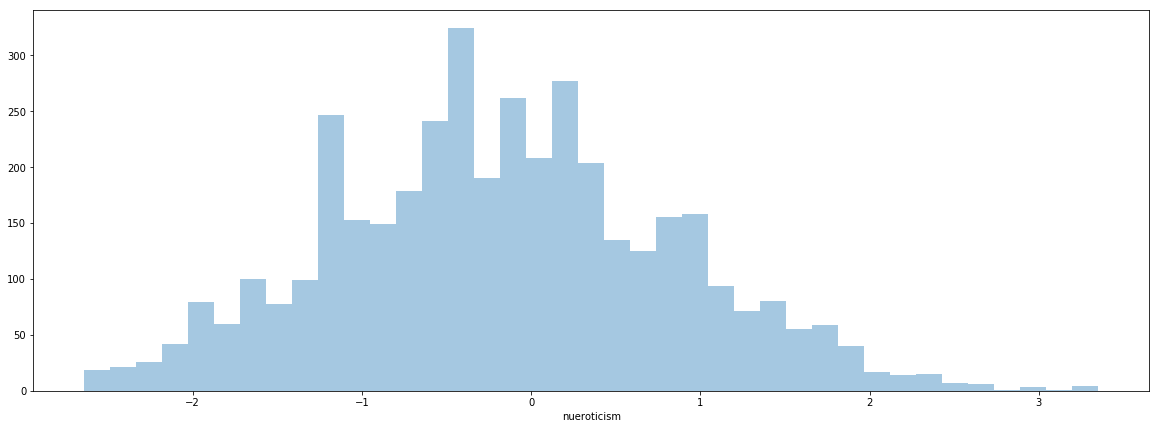

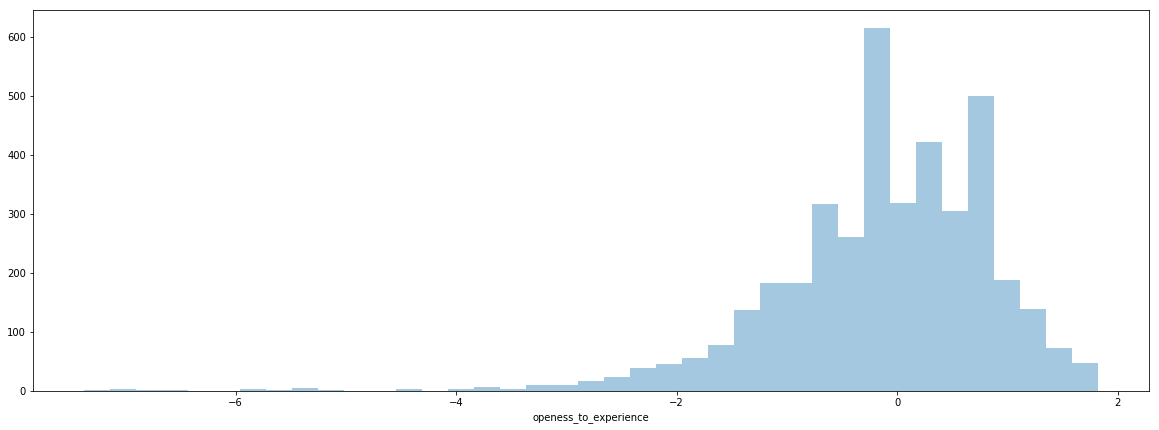

In [20]:
for i in num_var:
    plt.figure(figsize=(20,7))
    sns.distplot(df[i].dropna(),kde=False,bins=39)

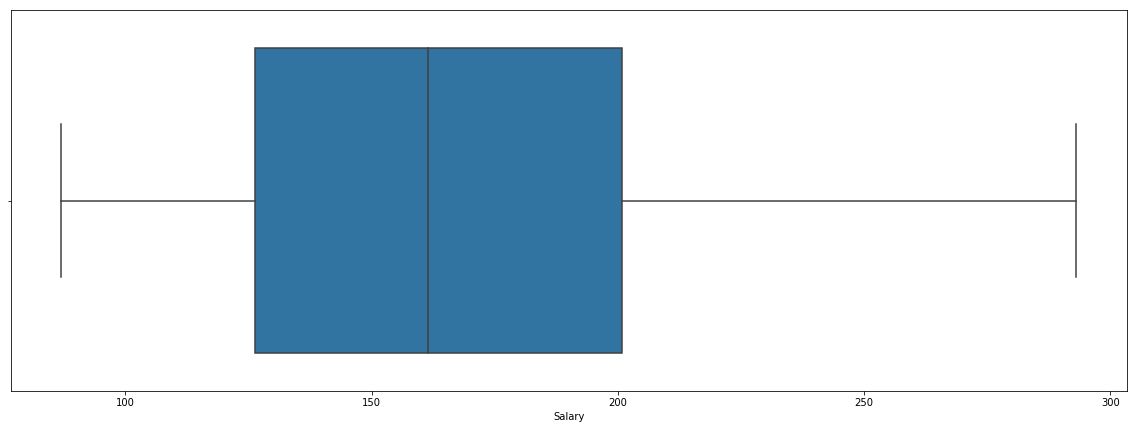

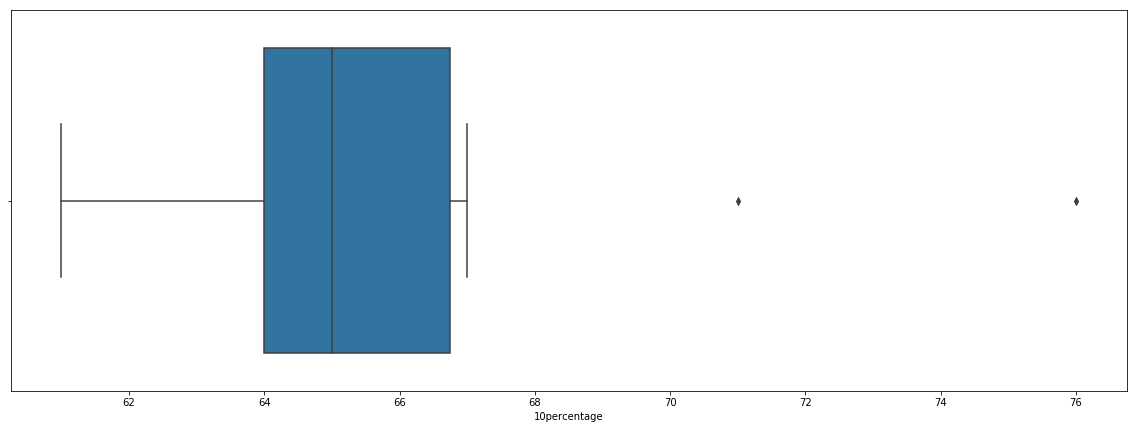

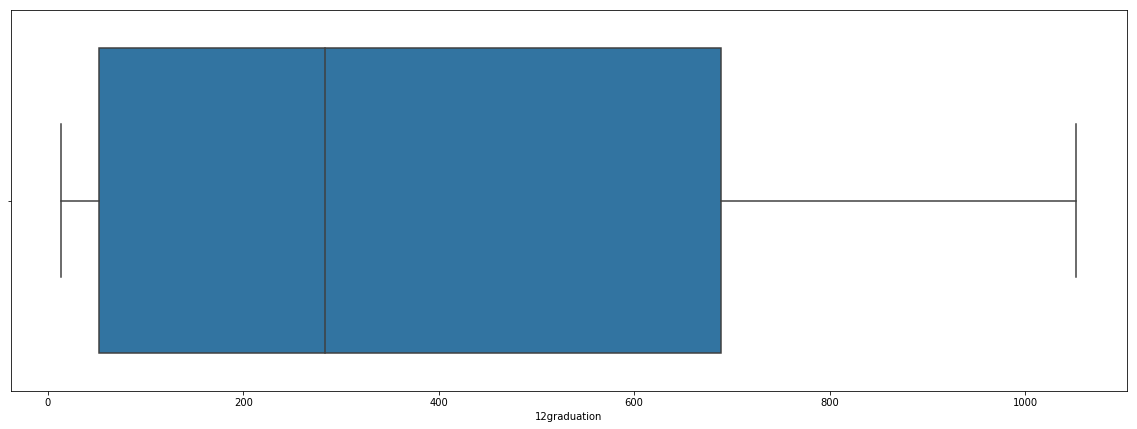

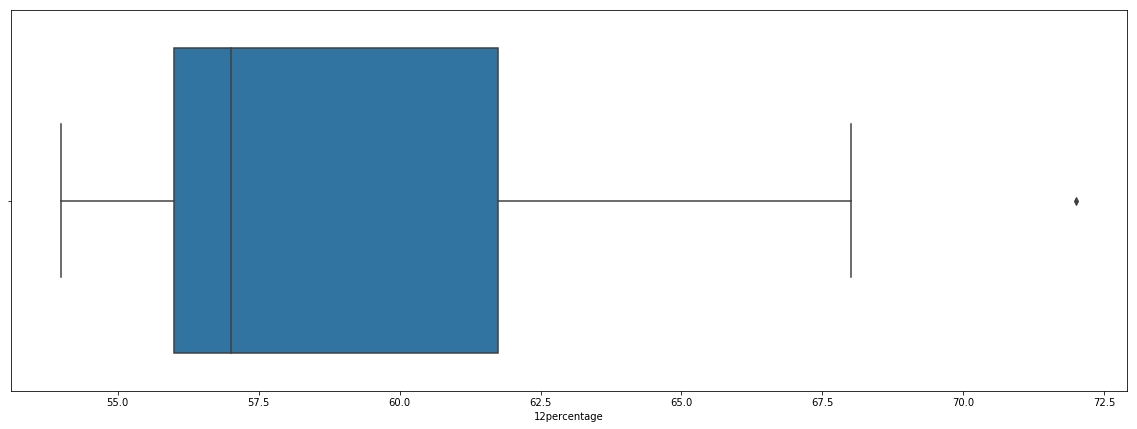

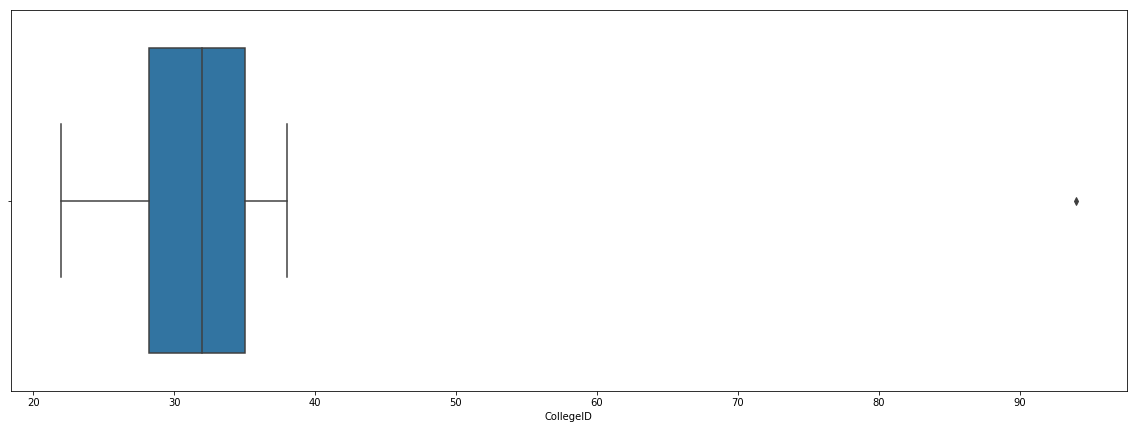

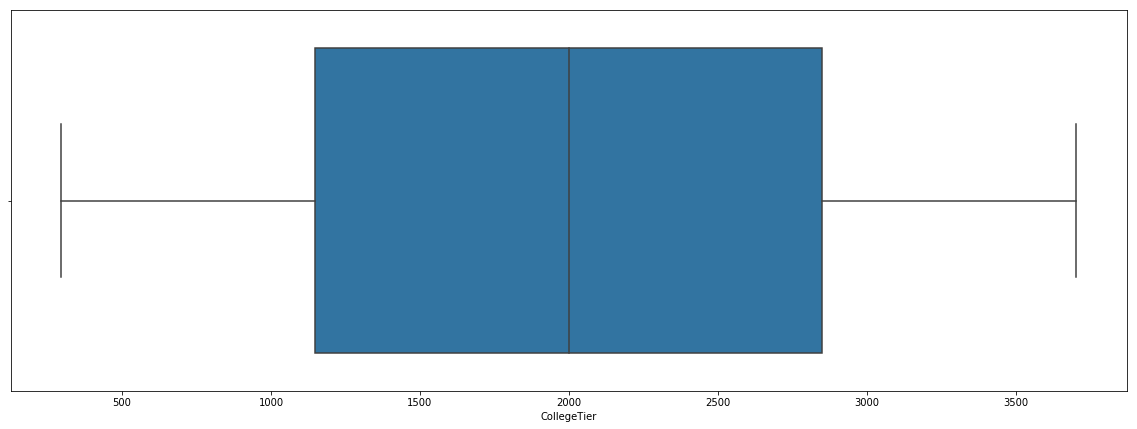

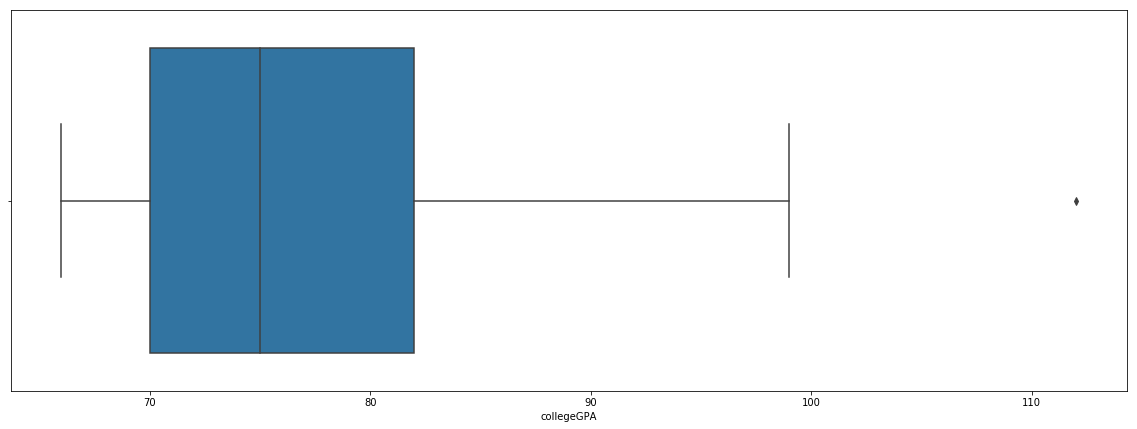

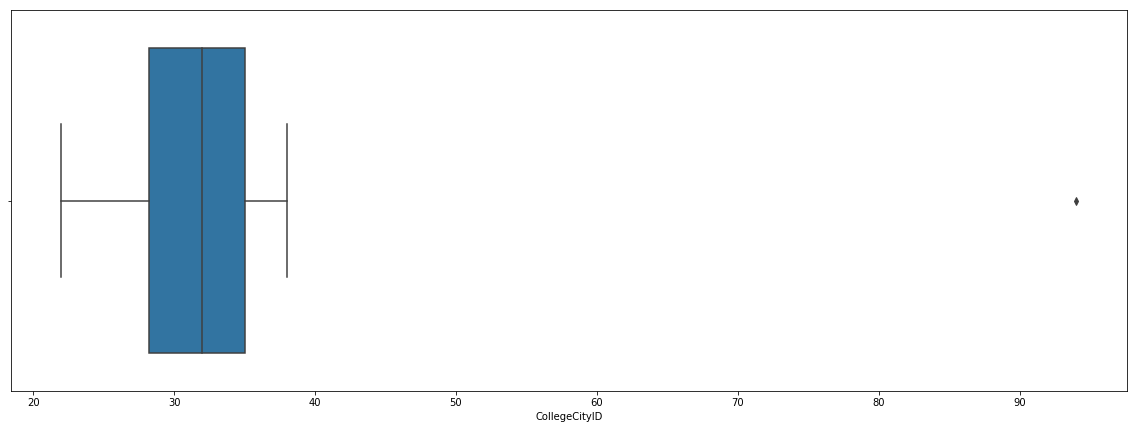

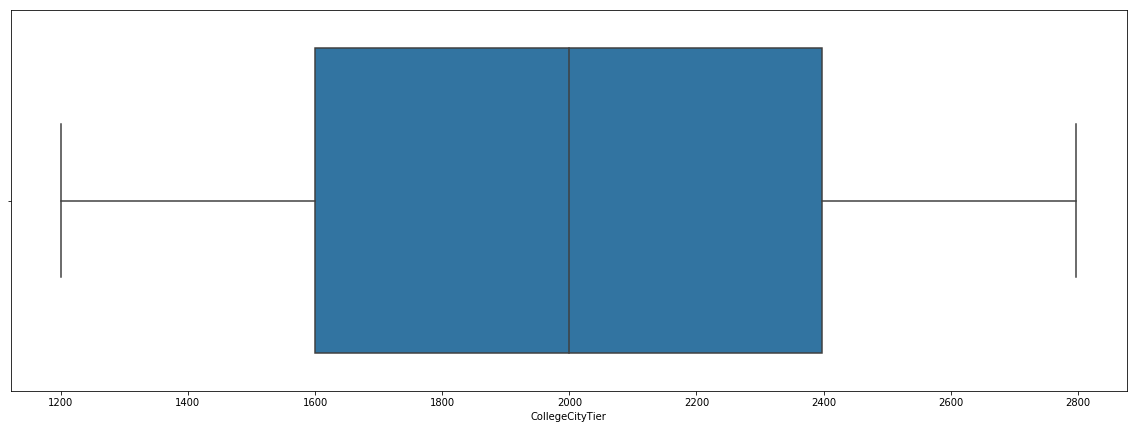

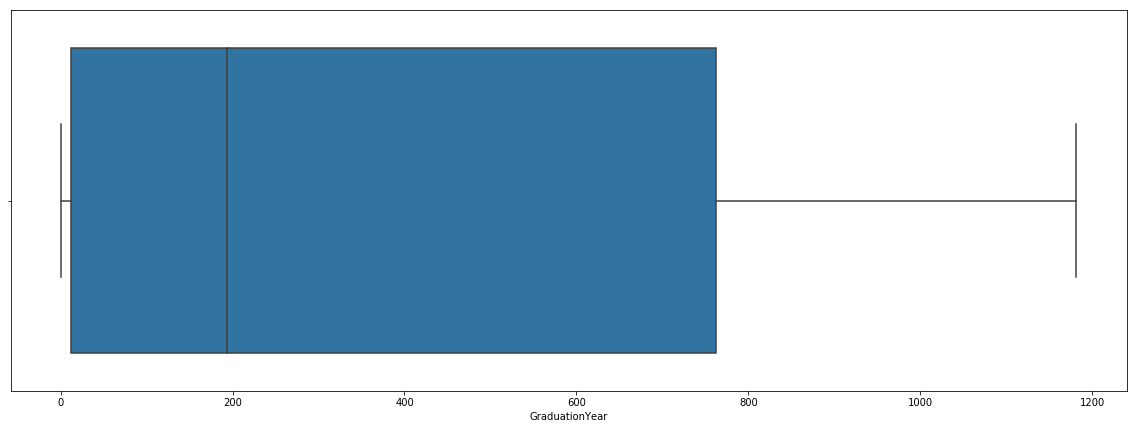

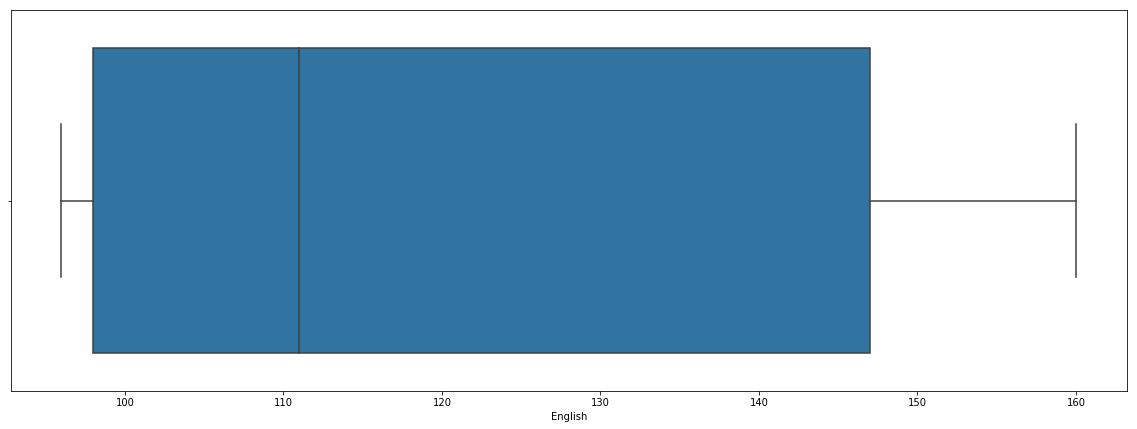

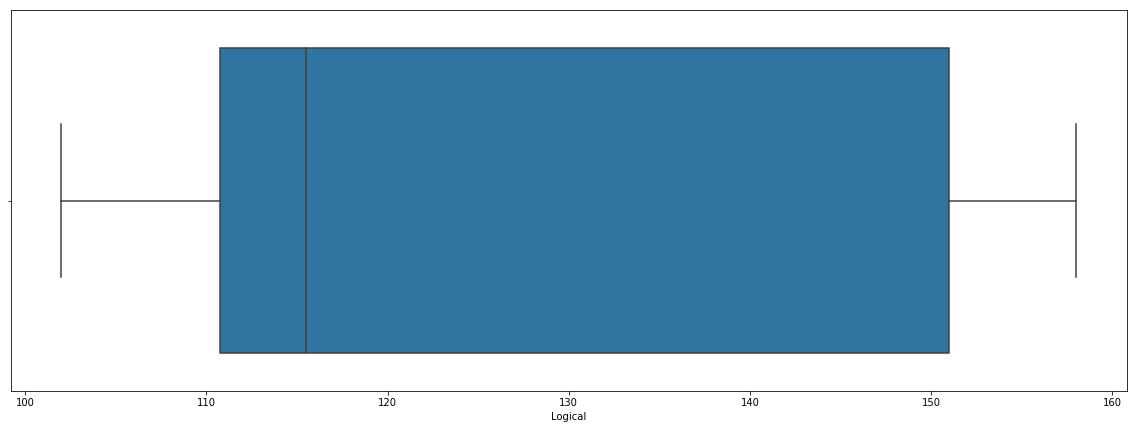

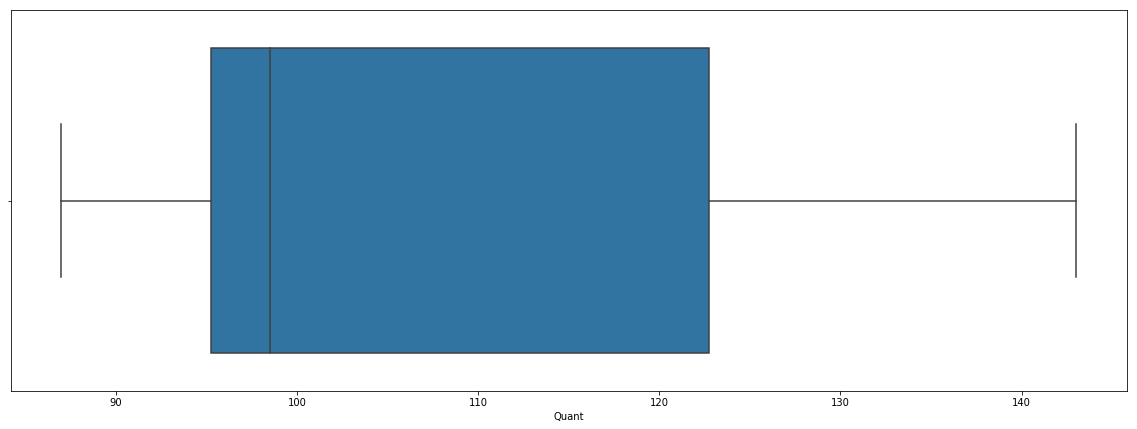

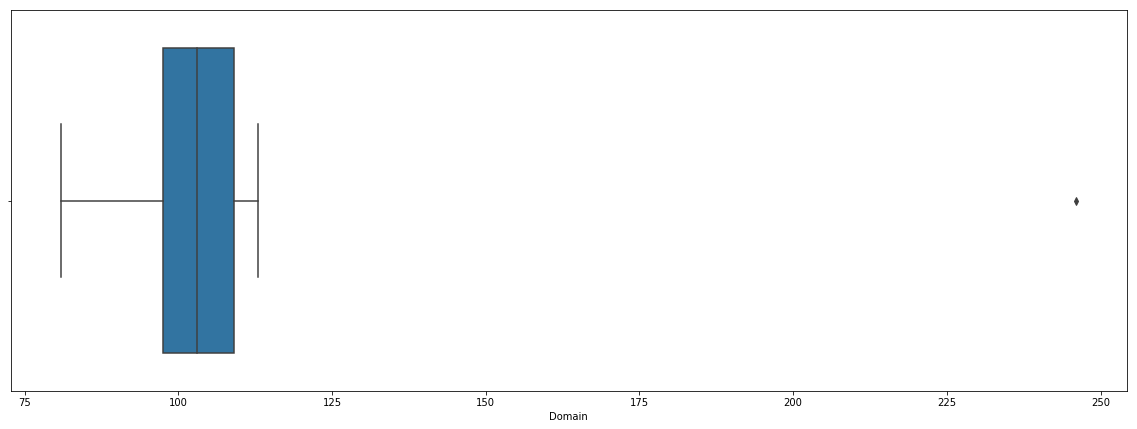

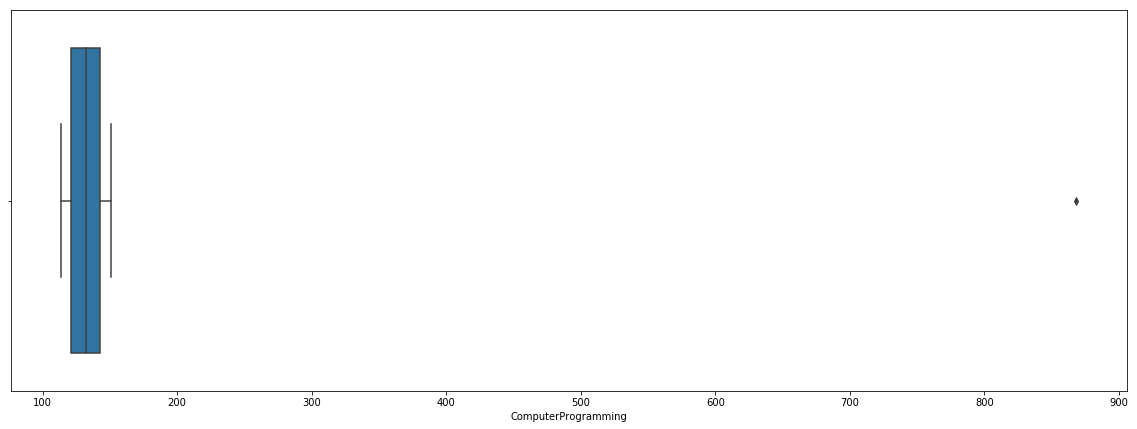

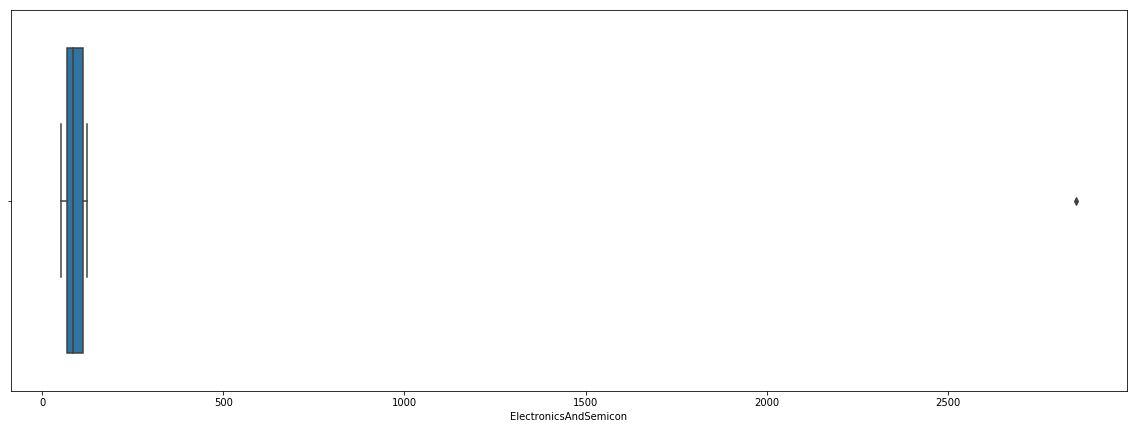

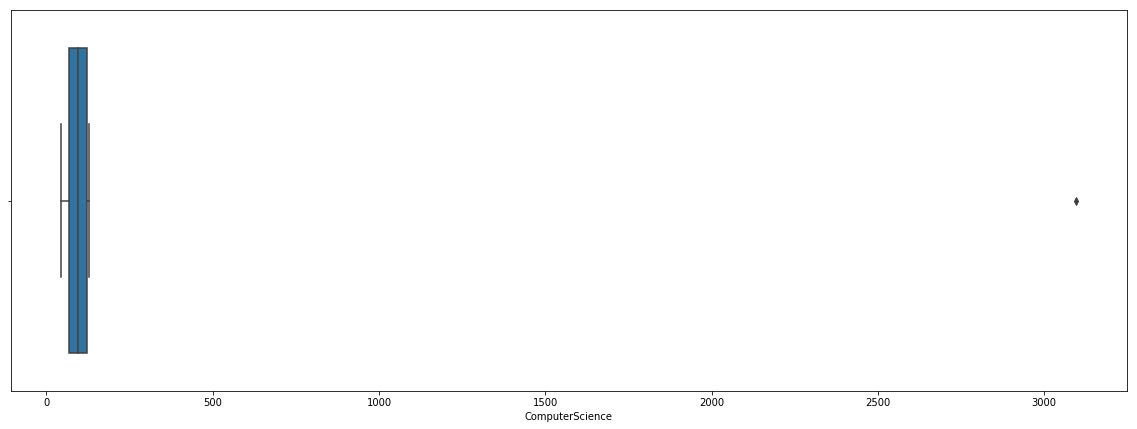

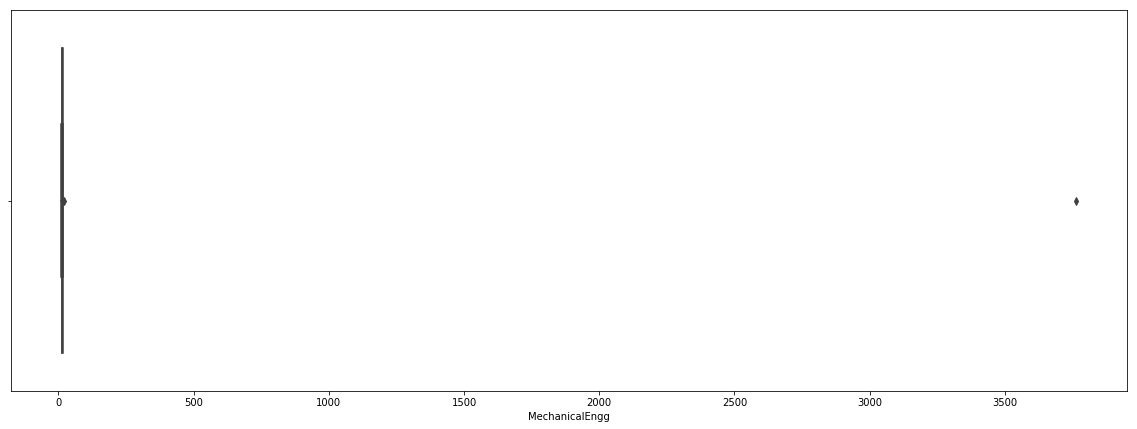

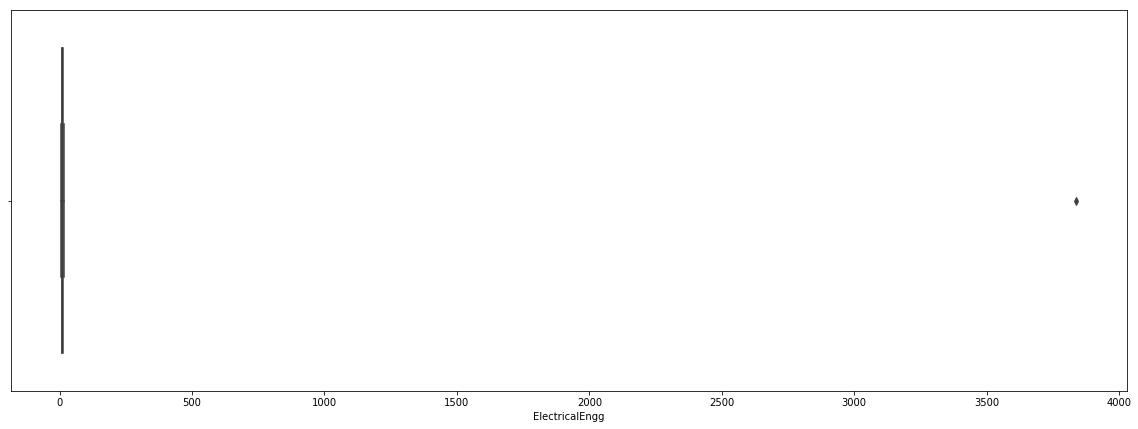

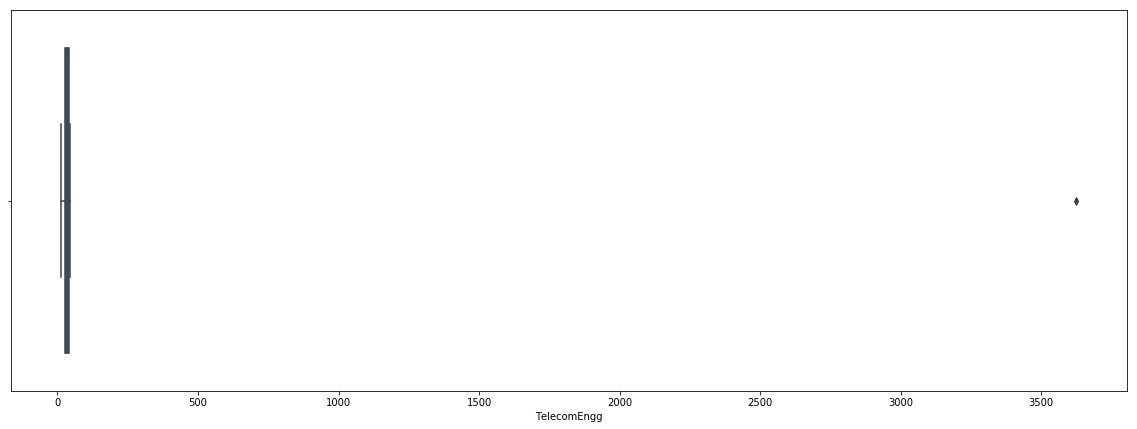

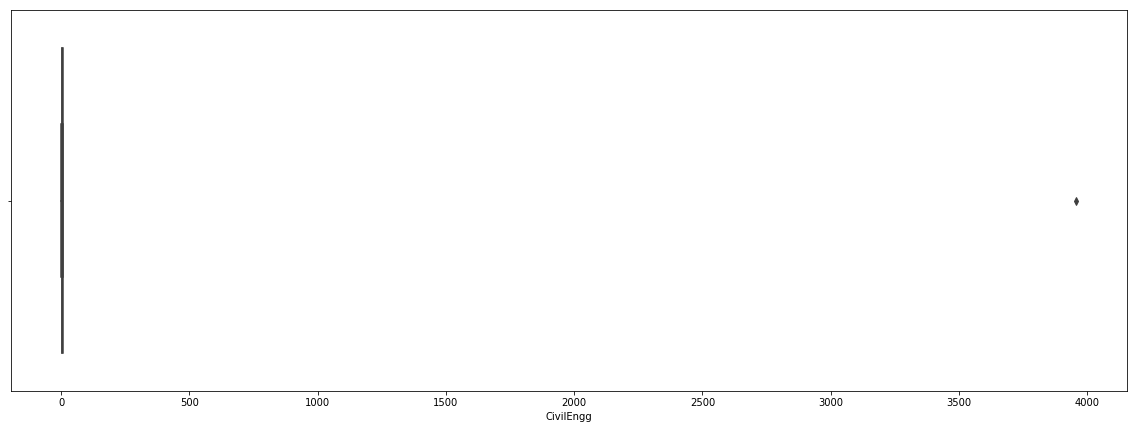

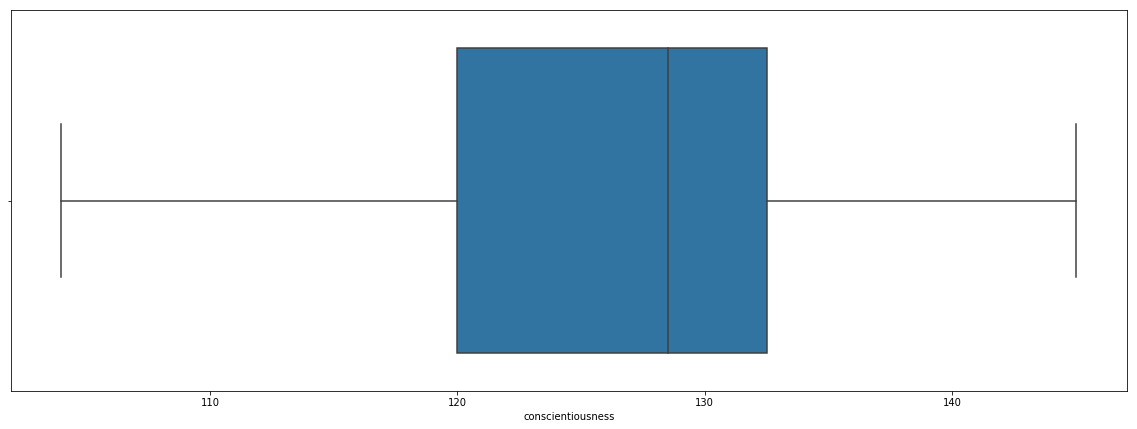

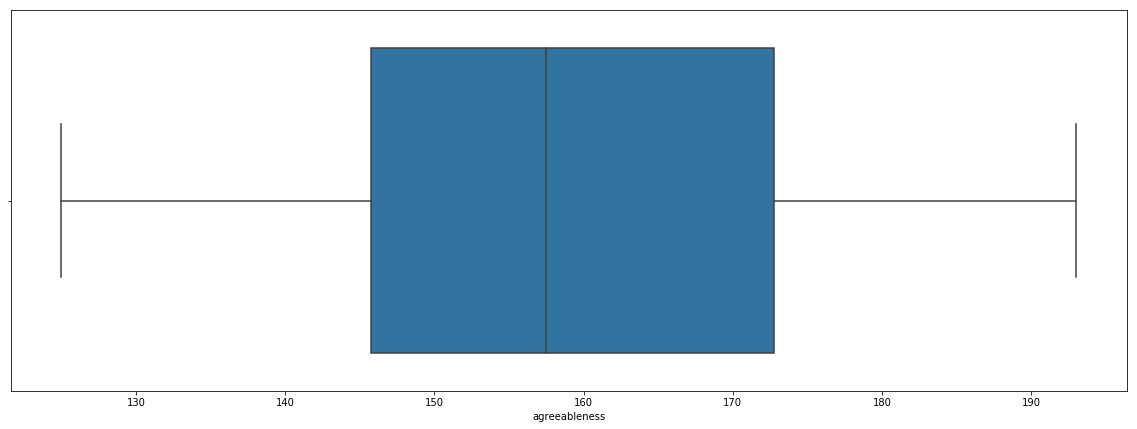

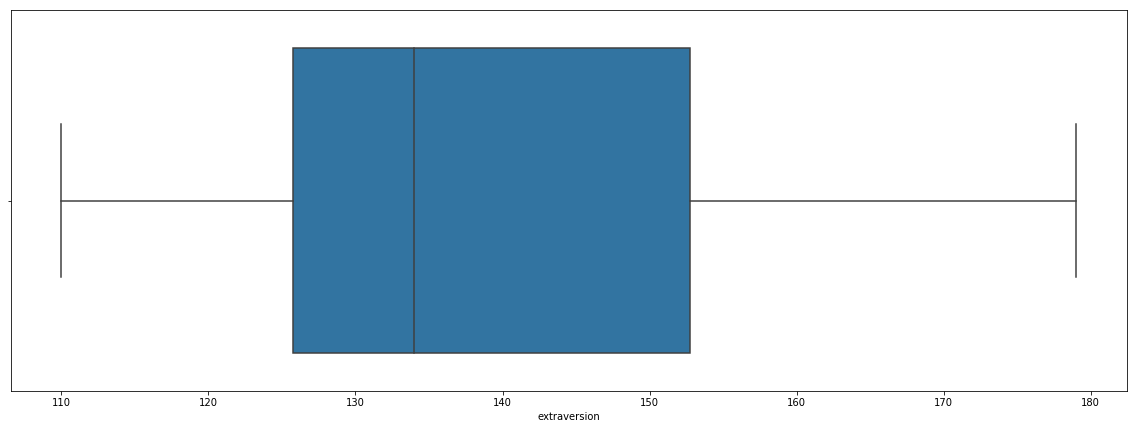

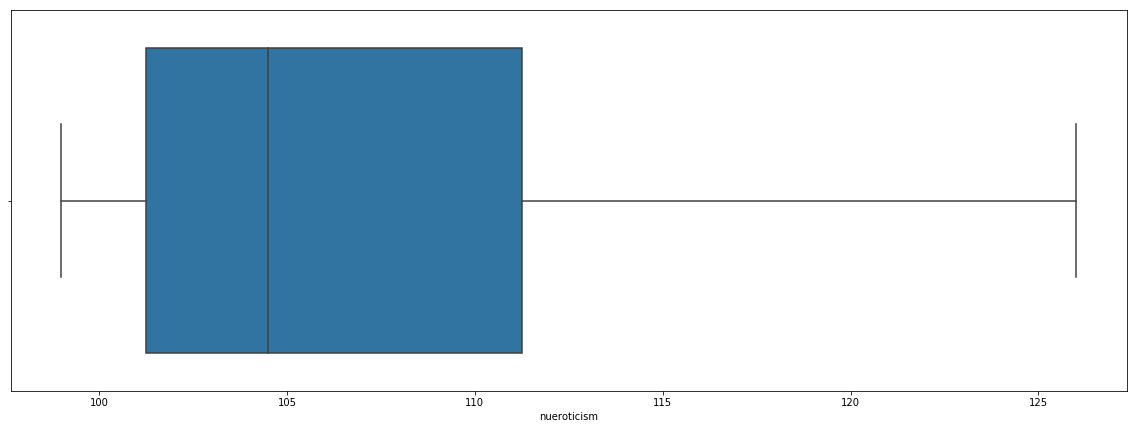

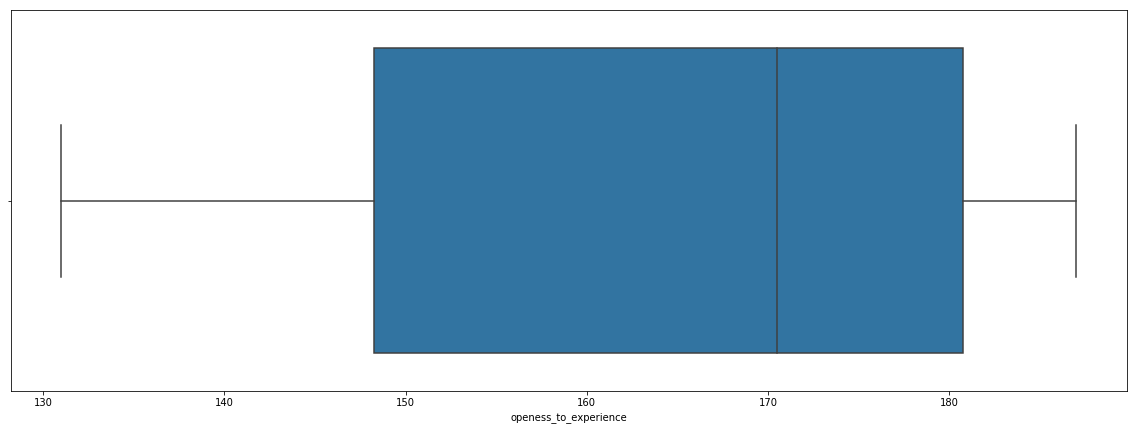

In [21]:
for i in num_var:
    plt.figure(figsize=(20,7))
    sns.boxplot(x=df[i].value_counts().head(10))

In [22]:
print(df['Designation'].value_counts().head(10))

software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
Name: Designation, dtype: int64


# Pie chart

* Univeriate<br>
* categorical Variable<br>

## Pie Chart for Designation column

([<matplotlib.patches.Wedge at 0x1d374e3b7b8>,
 [Text(0.5990462010467409, 0.9225744680032436, 'software engineer'),
  Text(-0.8672005539532778, 0.6767297830176594, 'software developer'),
  Text(-1.0769925073829816, -0.22380156174816743, 'system engineer'),
  Text(-0.7343320342051123, -0.8189972304838289, 'programmer analyst'),
  Text(-0.2791403523685677, -1.0639927930580884, 'systems engineer'),
  Text(0.18189717505173894, -1.0848564041882214, 'java software engineer'),
  Text(0.5801919153898676, -0.9345465966532844, 'software test engineer'),
  Text(0.8494252200516093, -0.6989111499613349, 'project engineer'),
  Text(1.0105433600630815, -0.43451365620935023, 'technical support engineer'),
  Text(1.0903000515240002, -0.1457593827057547, 'senior software engineer')],
 [Text(0.32675247329822227, 0.5032224370926782, '31.7%'),
  Text(-0.47301848397451507, 0.36912533619145055, '15.6%'),
  Text(-0.5874504585725353, -0.12207357913536404, '12.0%'),
  Text(-0.4005447459300612, -0.44672576208208

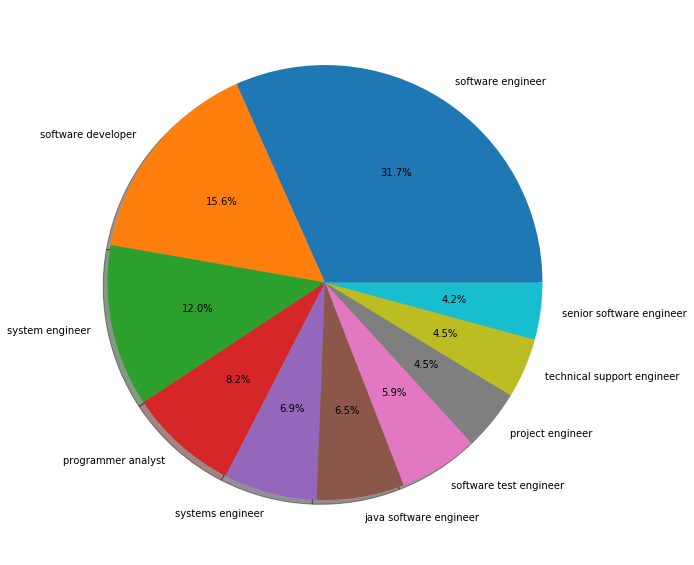

In [23]:
labels = ['software engineer','software developer','system engineer','programmer analyst',
          'systems engineer','java software engineer','software test engineer','project engineer',
         'technical support engineer','senior software engineer']
plt.figure(figsize=(10,10))
plt.pie(df['Designation'].value_counts().head(10),labels=labels,shadow=True,autopct='%1.1f%%')

# Bivariate Analysis

### Scatter plot<br>
The simplest bivariate plot is the lowly scatter plot. A simple scatter plot simply maps each variable of interest to a point in two-dimensional space<br>

## Numerical vs Numerical<br>

These plots showing relationship among Salary feature to all features

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


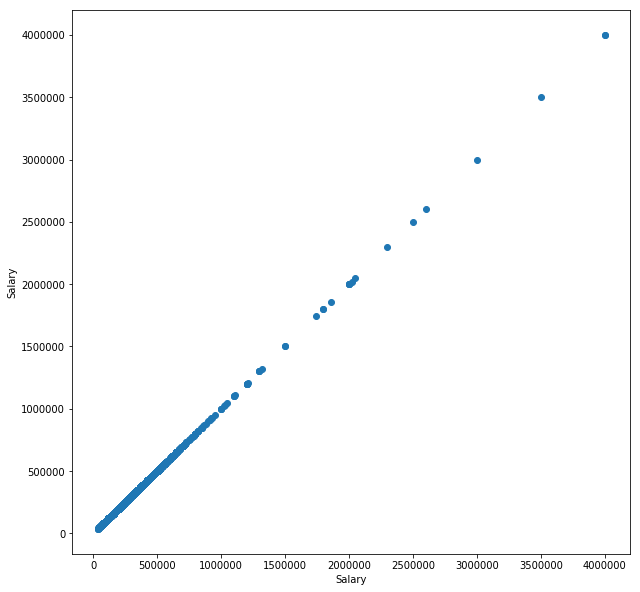

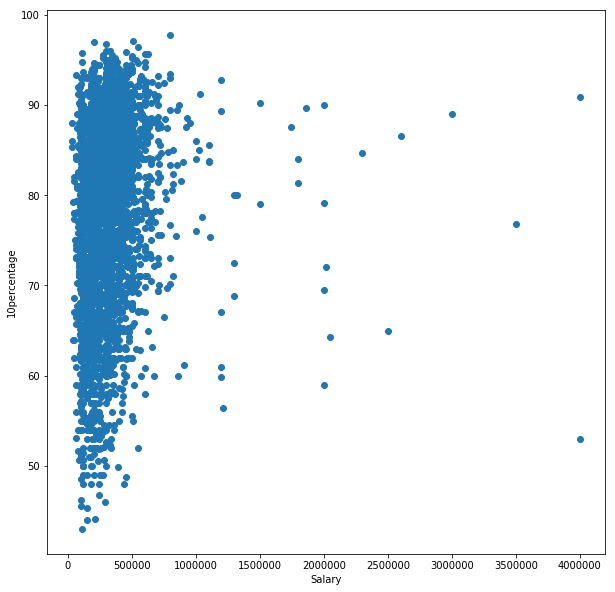

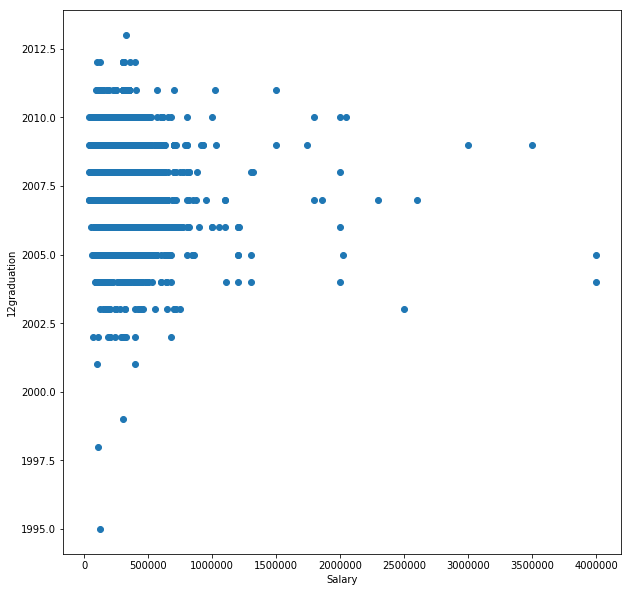

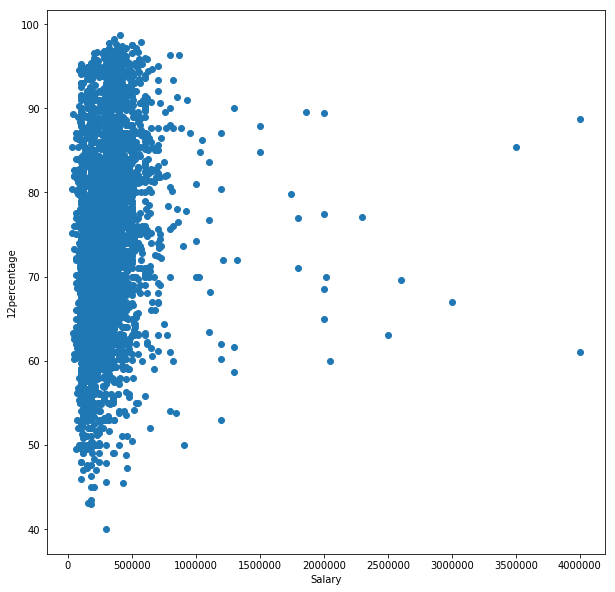

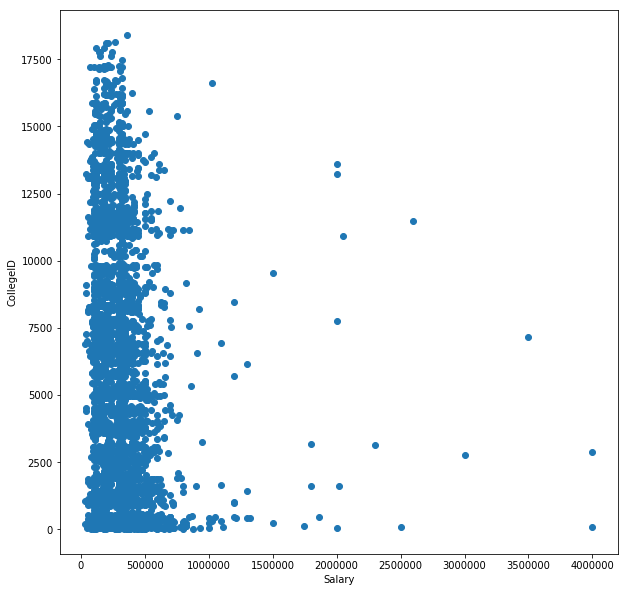

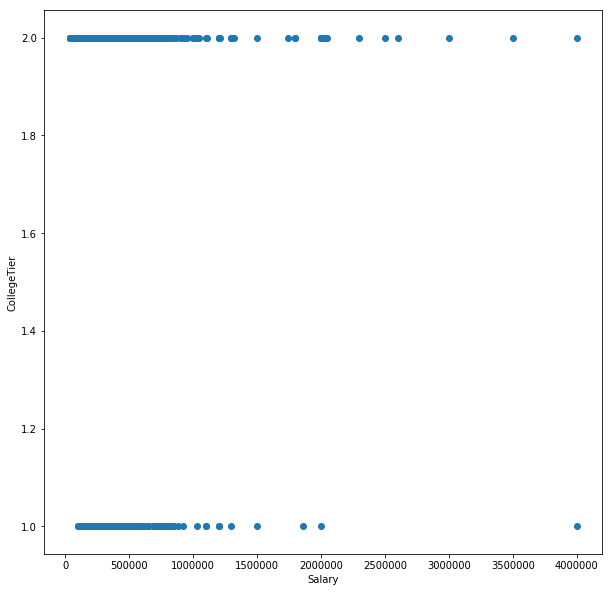

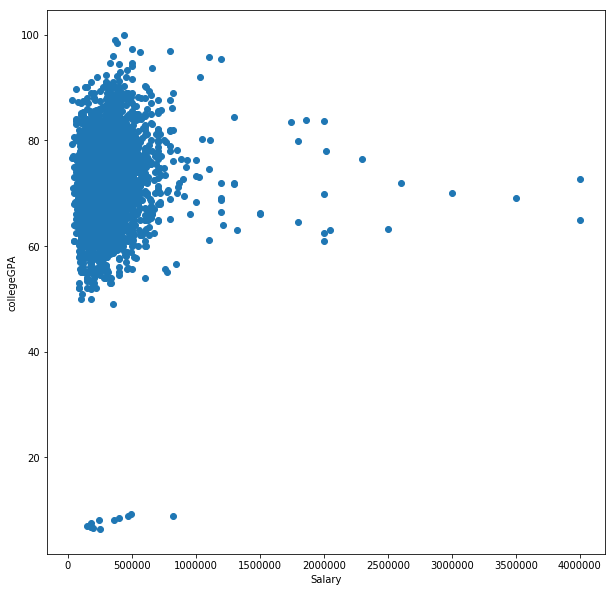

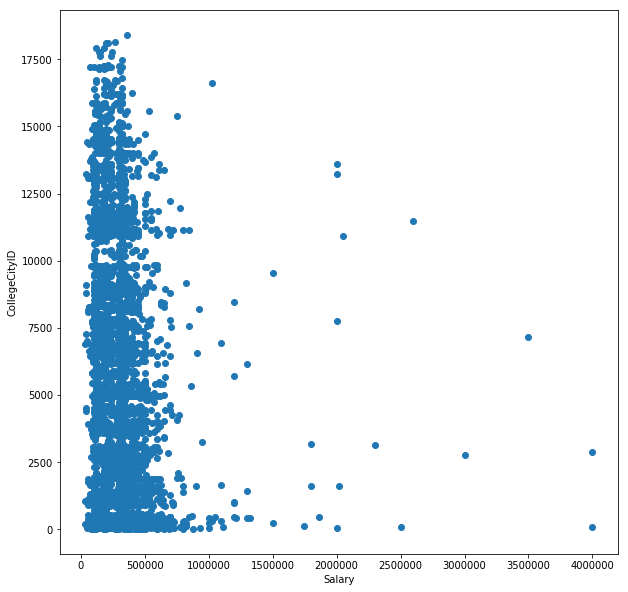

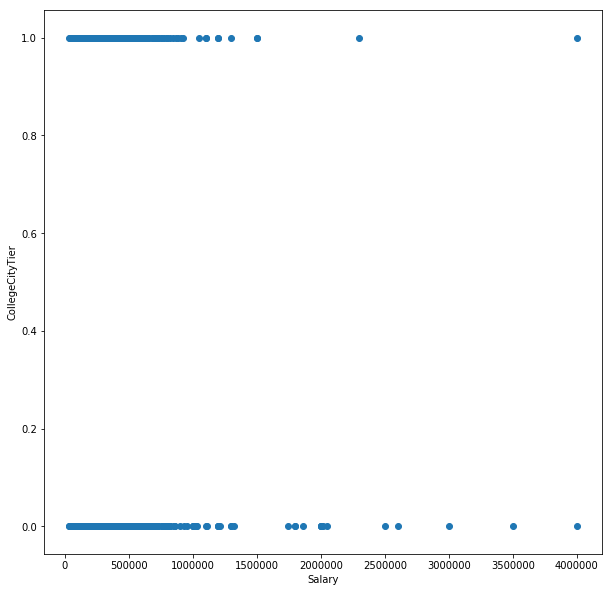

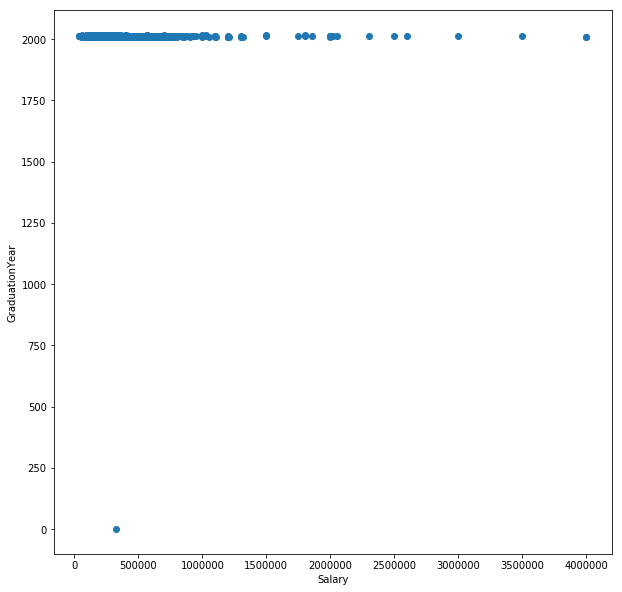

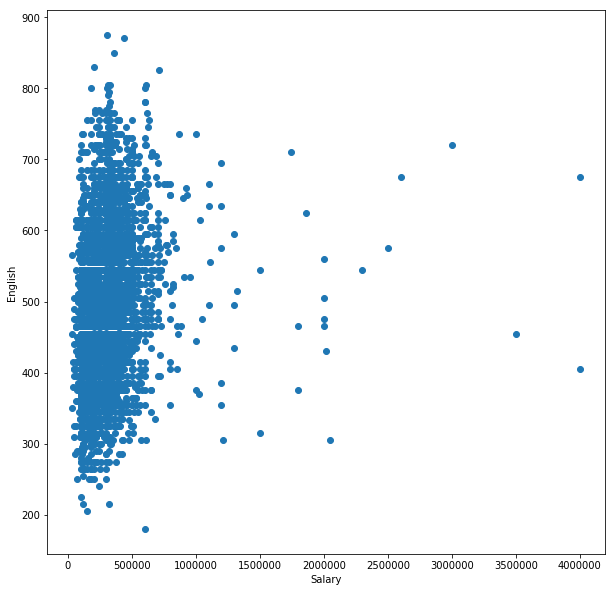

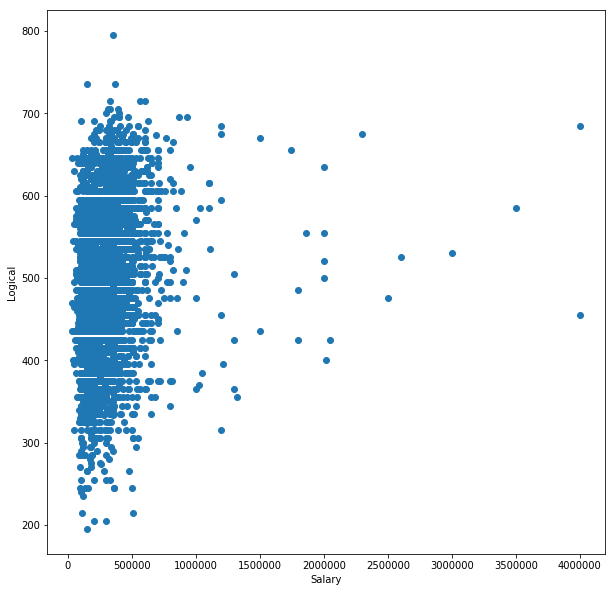

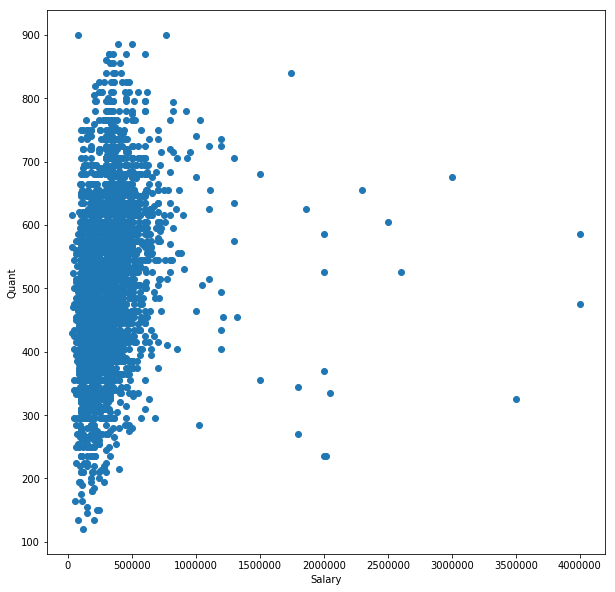

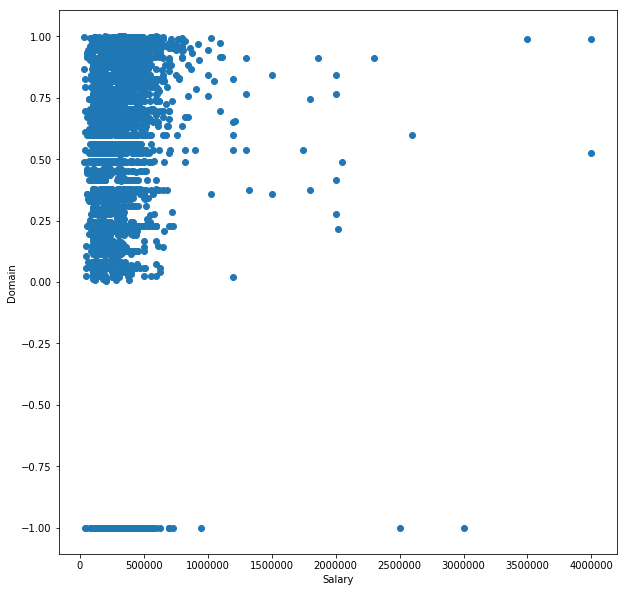

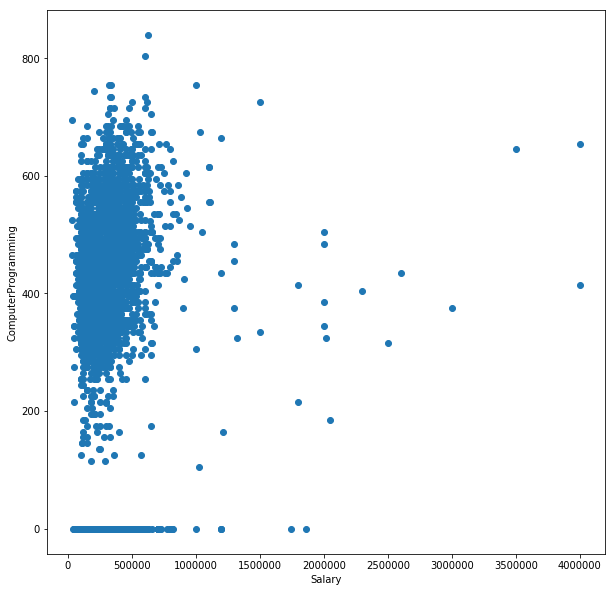

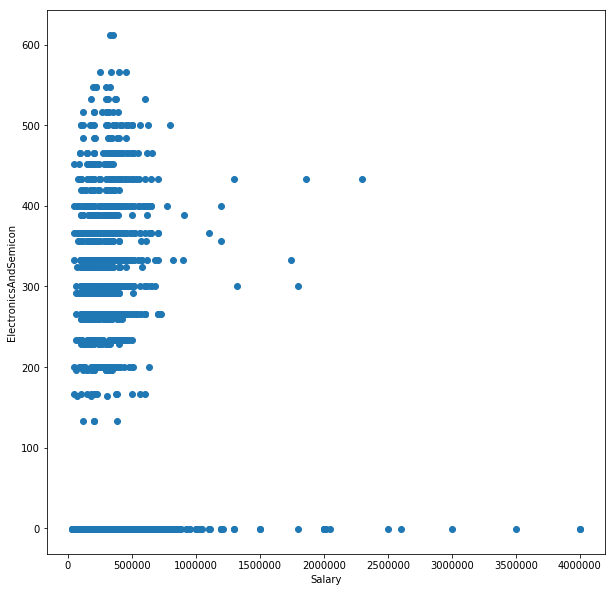

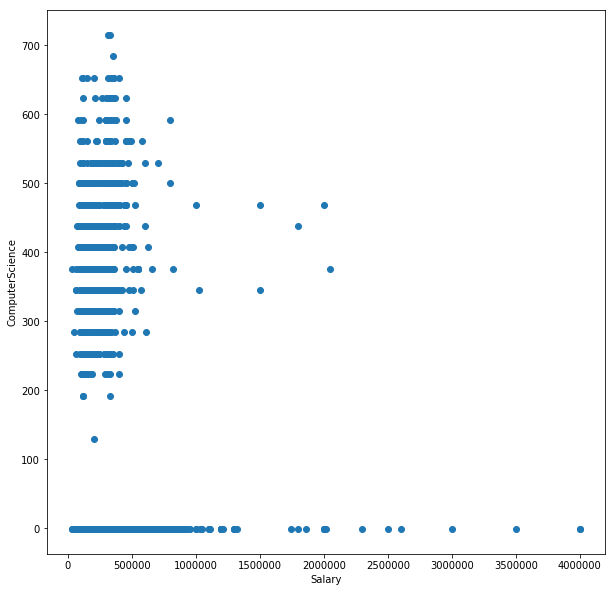

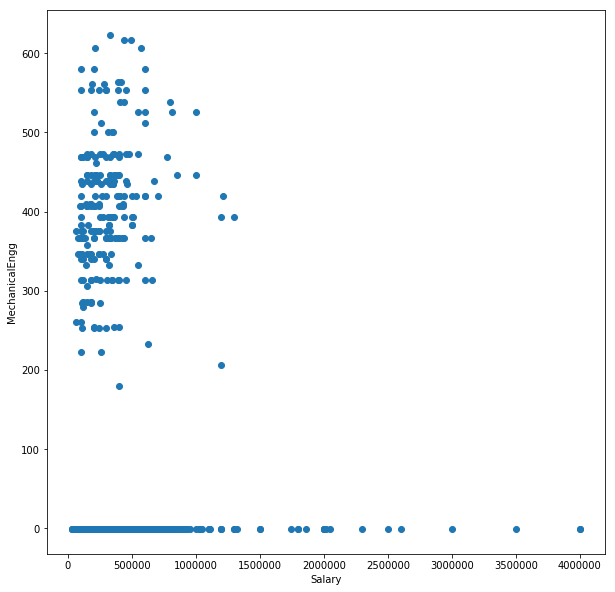

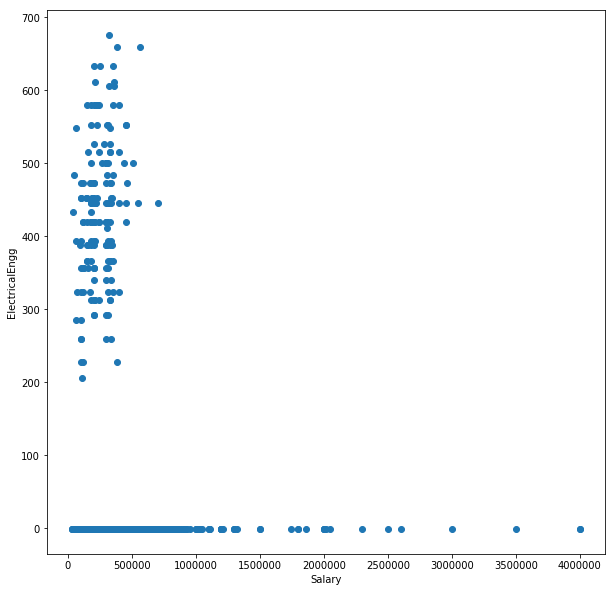

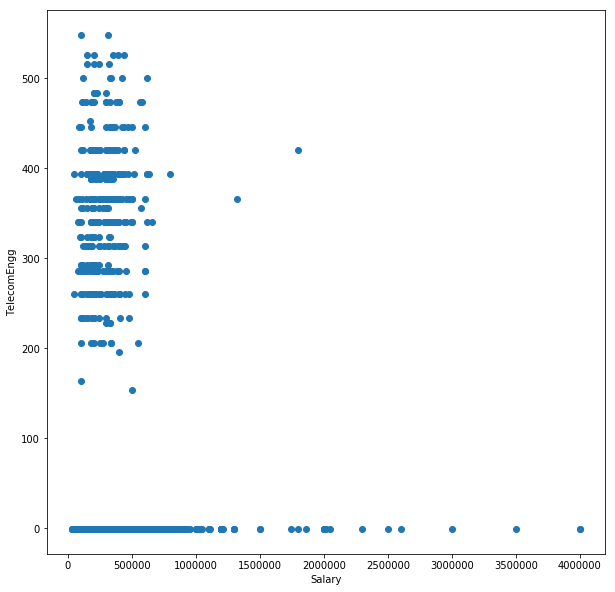

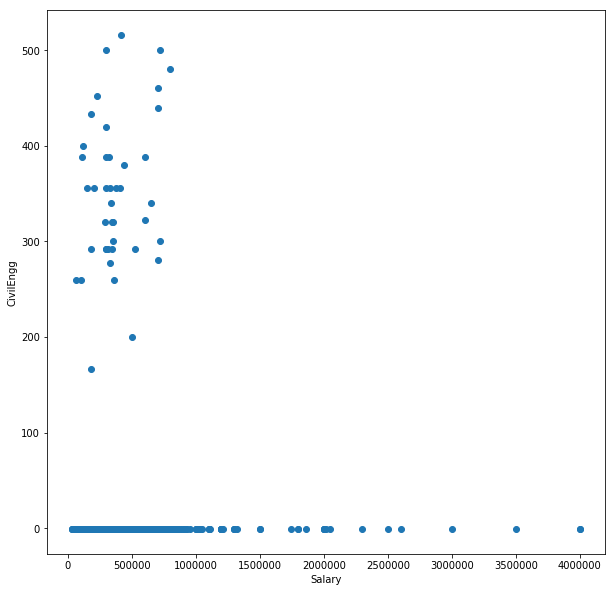

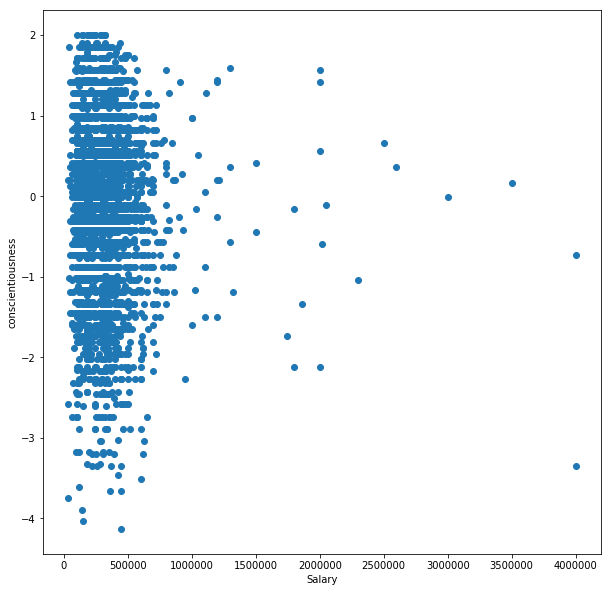

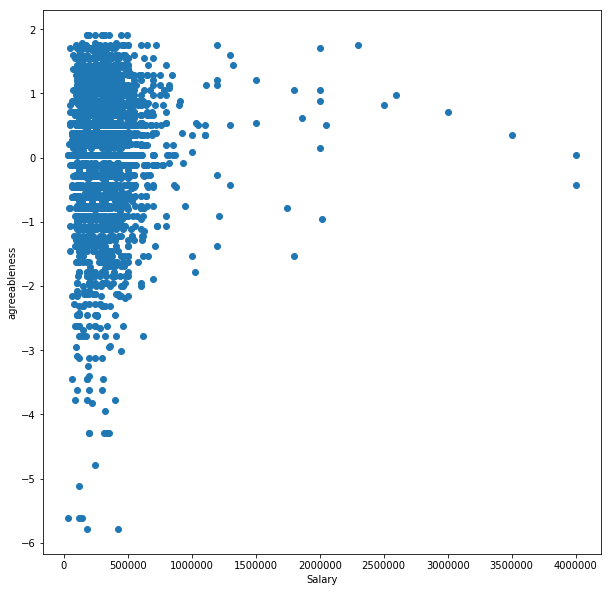

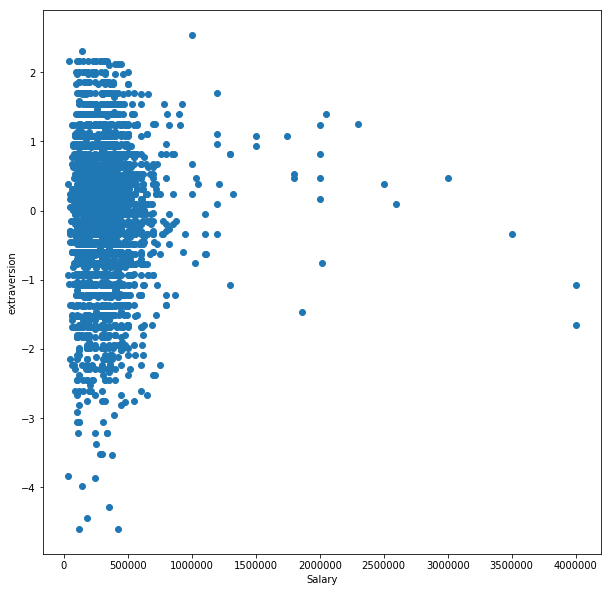

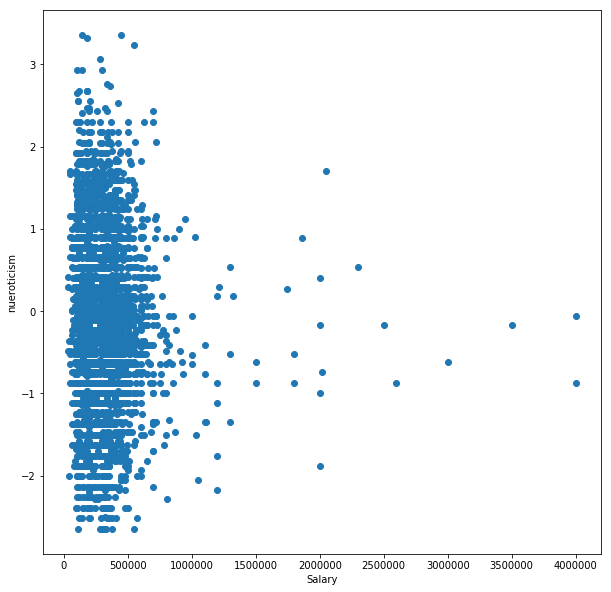

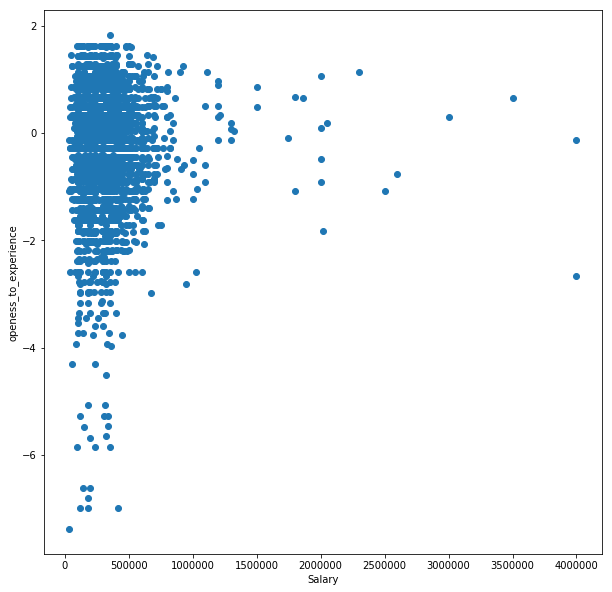

In [45]:
for i in num_var:
    plt.figure(figsize=(10,10))
    plt.xlabel('Salary')
    plt.ylabel(i)
    x=df['Salary']
    y=df[i]
    plt.scatter(x,y)

# continuous vs continuous variable plot

In [26]:
df['10percentage'].corr(df['12percentage'])

0.6433777960234052

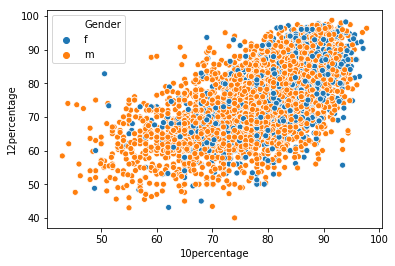

In [37]:
sns.scatterplot(x="10percentage",y="12percentage",data=df,hue="Gender")
plt.show()

# categorical vs continuous

In [28]:
df.groupby('Gender')['Salary'].mean()

Gender
f    294937.304075
m    311716.211772
Name: Salary, dtype: float64

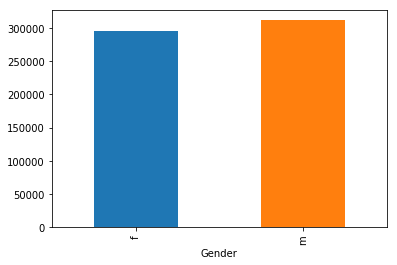

In [29]:
df.groupby('Gender')['Salary'].mean().plot.bar()

In [30]:
from scipy.stats import ttest_ind

In [31]:
males = df[df['Gender']=='m']
females = df[df['Gender']=='f']

In [32]:
ttest_ind(males['Salary'],females['Salary'],nan_policy='omit')

Ttest_indResult(statistic=2.128894934064978, pvalue=0.03332394177012777)

# categorical vs categorical

In [33]:
pd.crosstab(df['Gender'],df['Degree'])

Degree,B.Tech/B.E.,M.Sc. (Tech.),M.Tech./M.E.,MCA
Gender,,,,
f,889,1,9,58
m,2811,1,44,185


In [34]:
from scipy.stats import chi2_contingency

In [35]:
chi2_contingency(pd.crosstab(df['Gender'],df['Degree']))

(2.1716986251323305,
 0.5375443506696087,
 3,
 array([[8.85667834e+02, 4.78739370e-01, 1.26865933e+01, 5.81668334e+01],
        [2.81433217e+03, 1.52126063e+00, 4.03134067e+01, 1.84833167e+02]]))

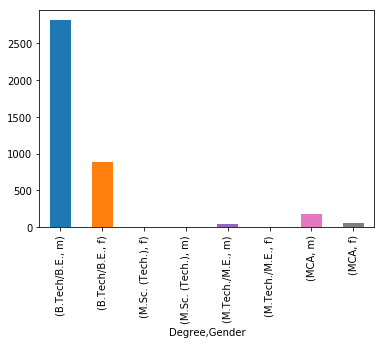

In [36]:
df.groupby('Degree')['Gender'].value_counts().plot.bar()